In [2]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(stats)
library(plotly)
library(RColorBrewer)
library(ape)
library(nlme)
library(reshape2)

### 14 Jan 2019 Analyses - updated with ultrametric tree

In [3]:
#Read in ultrametric tree, transform matrix to columns, rename columns
brlen.matrix = read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Micro_29_6nodes_800M_median_pdist.csv")
brlen.mdf = melt(brlen.matrix)
colnames(brlen.mdf)[1] <- "Host_A"
colnames(brlen.mdf)[2] <- "Host_B"
colnames(brlen.mdf)[3] <- "pdist"
brlen2 = mutate(brlen.mdf, Host_Pair = paste(Host_A, Host_B, sep = '/'))
brlen3 = select(brlen2, Host_Pair, pdist)
write.csv(brlen3, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/CSVfiles_for_tests/brlen_final.csv")


Using X as id variables


In [44]:
batfecal_ID = read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/fecal_IDs_update.csv")
batoral_ID = read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/oral_IDs_update.csv")
batskin_ID = read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/skin_IDs_update.csv")


In [64]:
fecal_wuf = readRDS("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/Bdiv/batfecal.wt.dist.wunif.rds")
oral_wuf = readRDS("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/Bdiv/batoral.wt.dist.wunif.rds")
skin_wuf = readRDS("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/Bdiv/batskin.wt.dist.wunif.rds")
fecal_wuf.df = melt(as.matrix(fecal_wuf))
oral_wuf.df = melt(as.matrix(oral_wuf))
skin_wuf.df = melt(as.matrix(skin_wuf))

fecal_uf = readRDS("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/Bdiv/batfecal.wt.dist.unif.rds")
oral_uf = readRDS("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/Bdiv/batoral.wt.dist.unif.rds")
skin_uf = readRDS("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/Bdiv/batskin.wt.dist.unif.rds")
fecal_uf.df = melt(as.matrix(fecal_uf))
oral_uf.df = melt(as.matrix(oral_uf))
skin_uf.df = melt(as.matrix(skin_uf))

fecal_bc = readRDS("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/Bdiv/batfecal.wt.dist.bc.rds")
oral_bc = readRDS("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/Bdiv/batoral.wt.dist.bc.rds")
skin_bc = readRDS("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/Bdiv/batskin.wt.dist.bc.rds")
fecal_bc.df = melt(as.matrix(fecal_bc))
oral_bc.df = melt(as.matrix(oral_bc))
skin_bc.df = melt(as.matrix(skin_bc))

fecal_bc = fecal_wuf3

#Rename columns

#wuf

colnames(fecal_wuf.df)[1] <- "Host_A"
colnames(fecal_wuf.df)[2] <- "Host_B"
colnames(fecal_wuf.df)[3] <- "wuf"

colnames(oral_wuf.df)[1] <- "Host_A"
colnames(oral_wuf.df)[2] <- "Host_B"
colnames(oral_wuf.df)[3] <- "wuf"

colnames(skin_wuf.df)[1] <- "Host_A"
colnames(skin_wuf.df)[2] <- "Host_B"
colnames(skin_wuf.df)[3] <- "wuf"

#uf

colnames(fecal_uf.df)[1] <- "Host_A"
colnames(fecal_uf.df)[2] <- "Host_B"
colnames(fecal_uf.df)[3] <- "uf"

colnames(oral_uf.df)[1] <- "Host_A"
colnames(oral_uf.df)[2] <- "Host_B"
colnames(oral_uf.df)[3] <- "uf"

colnames(skin_uf.df)[1] <- "Host_A"
colnames(skin_uf.df)[2] <- "Host_B"
colnames(skin_uf.df)[3] <- "uf"

#bc

colnames(fecal_bc.df)[1] <- "Host_A"
colnames(fecal_bc.df)[2] <- "Host_B"
colnames(fecal_bc.df)[3] <- "bc"

colnames(oral_bc.df)[1] <- "Host_A"
colnames(oral_bc.df)[2] <- "Host_B"
colnames(oral_bc.df)[3] <- "bc"

colnames(skin_bc.df)[1] <- "Host_A"
colnames(skin_bc.df)[2] <- "Host_B"
colnames(skin_bc.df)[3] <- "bc"

#Replace SampleIDs with Host_name

fecal_wuf.df$Host_A <- batfecal_ID$Host_names[match(fecal_wuf.df$Host_A, batfecal_ID$Sample)]
oral_wuf.df$Host_A <- batoral_ID$Host_names[match(oral_wuf.df$Host_A, batoral_ID$Sample)]
skin_wuf.df$Host_A <- batskin_ID$Host_names[match(skin_wuf.df$Host_A, batskin_ID$Sample)]

fecal_uf.df$Host_A <- batfecal_ID$Host_names[match(fecal_uf.df$Host_A, batfecal_ID$Sample)]
oral_uf.df$Host_A <- batoral_ID$Host_names[match(oral_uf.df$Host_A, batoral_ID$Sample)]
skin_uf.df$Host_A <- batskin_ID$Host_names[match(skin_uf.df$Host_A, batskin_ID$Sample)]

fecal_bc.df$Host_A <- batfecal_ID$Host_names[match(fecal_bc.df$Host_A, batfecal_ID$Sample)]
oral_bc.df$Host_A <- batoral_ID$Host_names[match(oral_bc.df$Host_A, batoral_ID$Sample)]
skin_bc.df$Host_A <- batskin_ID$Host_names[match(skin_bc.df$Host_A, batskin_ID$Sample)]

fecal_wuf.df$Host_B <- batfecal_ID$Host_names[match(fecal_wuf.df$Host_B, batfecal_ID$Sample)]
oral_wuf.df$Host_B <- batoral_ID$Host_names[match(oral_wuf.df$Host_B, batoral_ID$Sample)]
skin_wuf.df$Host_B <- batskin_ID$Host_names[match(skin_wuf.df$Host_B, batskin_ID$Sample)]

fecal_uf.df$Host_B <- batfecal_ID$Host_names[match(fecal_uf.df$Host_B, batfecal_ID$Sample)]
oral_uf.df$Host_B <- batoral_ID$Host_names[match(oral_uf.df$Host_B, batoral_ID$Sample)]
skin_uf.df$Host_B <- batskin_ID$Host_names[match(skin_uf.df$Host_B, batskin_ID$Sample)]

fecal_bc.df$Host_B <- batfecal_ID$Host_names[match(fecal_bc.df$Host_B, batfecal_ID$Sample)]
oral_bc.df$Host_B <- batoral_ID$Host_names[match(oral_bc.df$Host_B, batoral_ID$Sample)]
skin_bc.df$Host_B <- batskin_ID$Host_names[match(skin_bc.df$Host_B, batskin_ID$Sample)]



In [40]:
head(fecal_wuf.df)

Host_A,Host_B,wuf
Rousettus_aegyptiacus,Rousettus_aegyptiacus,0.0000000
Rousettus_aegyptiacus,Rousettus_aegyptiacus,0.1853456
Triaenops_afer,Rousettus_aegyptiacus,0.3408151
Rhinolophus_clivosus_acrotis,Rousettus_aegyptiacus,0.1953830
Hipposideros_caffer,Rousettus_aegyptiacus,0.2094750
Rhinolophus_eloquens,Rousettus_aegyptiacus,0.2208729


In [65]:
#Create new column concatening names for pairwise comps
#wuf
fecal.wuf = mutate(fecal_wuf.df, Host_Pair = paste(Host_A, Host_B, sep = '/'))
oral.wuf = mutate(oral_wuf.df, Host_Pair = paste(Host_A, Host_B, sep = '/'))
skin.wuf = mutate(skin_wuf.df, Host_Pair = paste(Host_A, Host_B, sep = '/'))

fecal.wuf = select(fecal.wuf, Host_Pair, wuf)
oral.wuf = select(oral.wuf, Host_Pair, wuf)
skin.wuf = select(skin.wuf, Host_Pair, wuf)

#uf

fecal.uf = mutate(fecal_uf.df, Host_Pair = paste(Host_A, Host_B, sep = '/'))
oral.uf = mutate(oral_uf.df, Host_Pair = paste(Host_A, Host_B, sep = '/'))
skin.uf = mutate(skin_uf.df, Host_Pair = paste(Host_A, Host_B, sep = '/'))

fecal.uf = select(fecal.uf, Host_Pair, uf)
oral.uf = select(oral.uf, Host_Pair, uf)
skin.uf = select(skin.uf, Host_Pair, uf)

#bc

fecal.bc = mutate(fecal_bc.df, Host_Pair = paste(Host_A, Host_B, sep = '/'))
oral.bc = mutate(oral_bc.df, Host_Pair = paste(Host_A, Host_B, sep = '/'))
skin.bc = mutate(skin_bc.df, Host_Pair = paste(Host_A, Host_B, sep = '/'))

fecal.bc = select(fecal.bc, Host_Pair, bc)
oral.bc = select(oral.bc, Host_Pair, bc)
skin.bc = select(skin.bc, Host_Pair, bc)

#Save files
write.csv(fecal.wuf, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/CSVfiles_for_tests/fecal_wuf.csv")
write.csv(oral.wuf, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/CSVfiles_for_tests/oral_wuf.csv")
write.csv(skin.wuf, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/CSVfiles_for_tests/skin_wuf.csv")

write.csv(fecal.uf, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/CSVfiles_for_tests/fecal_uf.csv")
write.csv(oral.uf, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/CSVfiles_for_tests/oral_uf.csv")
write.csv(skin.uf, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/CSVfiles_for_tests/skin_uf.csv")

write.csv(fecal.bc, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/CSVfiles_for_tests/fecal_bc.csv")
write.csv(oral.bc, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/CSVfiles_for_tests/oral_bc.csv")
write.csv(skin.bc, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/CSVfiles_for_tests/skin_bc.csv")

In [66]:
fecal_wuf_mt = left_join(fecal.wuf, brlen3)
fecal_uf_mt = left_join(fecal.uf, brlen3)
fecal_bc_mt = left_join(fecal.bc, brlen3)
write.csv(fecal_wuf_mt, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Data_for_Plots/fecal_wuf_mt_plot_data.csv")
write.csv(fecal_uf_mt, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Data_for_Plots/fecal_uf_mt_plot_data.csv")
write.csv(fecal_bc_mt, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Data_for_Plots/fecal_bc_mt_plot_data.csv")

oral_wuf_mt = left_join(oral.wuf, brlen3)
oral_uf_mt = left_join(oral.uf, brlen3)
oral_bc_mt = left_join(oral.bc, brlen3)
write.csv(oral_wuf_mt, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Data_for_Plots/oral_wuf_mt_plot_data.csv")
write.csv(oral_uf_mt, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Data_for_Plots/oral_uf_mt_plot_data.csv")
write.csv(oral_bc_mt, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Data_for_Plots/oral_bc_mt_plot_data.csv")

skin_wuf_mt = left_join(skin.wuf, brlen3)
skin_uf_mt = left_join(skin.uf, brlen3)
skin_bc_mt = left_join(skin.bc, brlen3)
write.csv(skin_wuf_mt, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Data_for_Plots/skin_wuf_mt_plot_data.csv")
write.csv(skin_uf_mt, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Data_for_Plots/skin_uf_mt_plot_data.csv")
write.csv(skin_bc_mt, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Data_for_Plots/skin_bc_mt_plot_data.csv")

Joining, by = "Host_Pair"
Joining, by = "Host_Pair"
Joining, by = "Host_Pair"
Joining, by = "Host_Pair"
Joining, by = "Host_Pair"
Joining, by = "Host_Pair"
Joining, by = "Host_Pair"
Joining, by = "Host_Pair"
Joining, by = "Host_Pair"


In [33]:
fecal_wuf.mt = select(fecal_wuf_mt, Host_Pair, wuf)
fecal_wuf.brlen.mt = select(fecal_wuf_mt, Host_Pair, pdist)

fecal_uf.mt = select(fecal_uf_mt, Host_Pair, uf)
fecal_uf.brlen.mt = select(fecal_uf_mt, Host_Pair, pdist)

fecal_bc.mt = select(fecal_bc_mt, Host_Pair, bc)
fecal_bc.brlen.mt = select(fecal_bc_mt, Host_Pair, pdist)

In [34]:
library(tidyr)
x <- separate(fecal_wuf.mt, col = Host_Pair, into = c("Host_A", "Host_B"), sep = "/")
y <- separate(fecal_wuf.brlen.mt,  col = Host_Pair, into = c("Host_A", "Host_B"), sep = "/")

x2 <- separate(fecal_uf.mt, col = Host_Pair, into = c("Host_A", "Host_B"), sep = "/")
y2 <- separate(fecal_uf.brlen.mt,  col = Host_Pair, into = c("Host_A", "Host_B"), sep = "/")

x3 <- separate(fecal_bc.mt, col = Host_Pair, into = c("Host_A", "Host_B"), sep = "/")
y3 <- separate(fecal_bc.brlen.mt,  col = Host_Pair, into = c("Host_A", "Host_B"), sep = "/")

#### (file manipulation in excel; ensure conformity of matrices)

### Mantel Tests

In [94]:
fecal_wuf = as.matrix(read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Final_files_for_MT/fecal_wuf_avg2.csv",  sep=",", row.names=1))
fecal_uf = as.matrix(read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Final_files_for_MT/fecal_uf_avg2.csv", sep=",", row.names=1))
fecal_bc = as.matrix(read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Final_files_for_MT/fecal_bc_avg2.csv", sep=",", row.names=1))

fecal_wuf.dist = as.matrix(read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Final_files_for_MT/fecal_wuf_pdist.csv", sep=",", row.names=1))
fecal_uf.dist = as.matrix(read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Final_files_for_MT/fecal_uf_pdist.csv", sep=",", row.names=1))
fecal_bc.dist = as.matrix(read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Final_files_for_MT/fecal_bc_pdist.csv", sep=",", row.names=1))

oral_wuf = as.matrix(read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Final_files_for_MT/oral_wuf_avg2.csv",  sep=",", row.names=1))
oral_uf = as.matrix(read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Final_files_for_MT/oral_uf_avg2.csv", sep=",", row.names=1))
oral_bc = as.matrix(read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Final_files_for_MT/oral_bc_avg2.csv", sep=",", row.names=1))

oral_wuf.dist = as.matrix(read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Final_files_for_MT/oral_wuf_pdist.csv", sep=",", row.names=1))
oral_uf.dist = as.matrix(read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Final_files_for_MT/oral_uf_pdist.csv", sep=",", row.names=1))
oral_bc.dist = as.matrix(read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Final_files_for_MT/oral_bc_pdist.csv", sep=",", row.names=1))

skin_wuf = as.matrix(read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Final_files_for_MT/skin_wuf_avg2.csv",  sep=",", row.names=1))
skin_uf = as.matrix(read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Final_files_for_MT/skin_uf_avg2.csv", sep=",", row.names=1))
skin_bc = as.matrix(read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Final_files_for_MT/skin_bc_avg2.csv", sep=",", row.names=1))

skin_wuf.dist = as.matrix(read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Final_files_for_MT/skin_wuf_pdist.csv", sep=",", row.names=1))
skin_uf.dist = as.matrix(read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Final_files_for_MT/skin_uf_pdist.csv", sep=",", row.names=1))
skin_bc.dist = as.matrix(read.csv("/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/Nature_data_results/MantelTest/Final_files_for_MT/skin_bc_pdist.csv", sep=",", row.names=1))


In [85]:
fecal.wuf.mantel = mantel(fecal_wuf, fecal_wuf.dist, method="pearson", permutations=10000)
fecal.wuf.mantel

fecal.uf.mantel = mantel(fecal_uf, fecal_uf.dist, method="pearson", permutations=10000)
fecal.uf.mantel

fecal.bc.mantel = mantel(fecal_bc, fecal_bc.dist, method="pearson", permutations=10000)
fecal.bc.mantel


Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = fecal_wuf, ydis = fecal_wuf.dist, method = "pearson",      permutations = 10000) 

Mantel statistic r: 0.008017 
      Significance: 0.42216 

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0761 0.1001 0.1241 0.1492 
Permutation: free
Number of permutations: 10000



Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = fecal_uf, ydis = fecal_uf.dist, method = "pearson",      permutations = 10000) 

Mantel statistic r: 0.1466 
      Significance: 0.013999 

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0753 0.1020 0.1268 0.1570 
Permutation: free
Number of permutations: 10000



Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = fecal_bc, ydis = fecal_bc.dist, method = "pearson",      permutations = 10000) 

Mantel statistic r: 0.1565 
      Significance: 0.010799 

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0746 0.1011 0.1246 0.1588 
Permutation: free
Number of permutations: 10000


In [95]:
oral.wuf.mantel = mantel(oral_wuf, oral_wuf.dist, method="pearson", permutations=10000)
oral.wuf.mantel

oral.uf.mantel = mantel(oral_uf, oral_uf.dist, method="pearson", permutations=10000)
oral.uf.mantel

oral.bc.mantel = mantel(oral_bc, oral_bc.dist, method="pearson", permutations=10000)
oral.bc.mantel


Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = oral_wuf, ydis = oral_wuf.dist, method = "pearson",      permutations = 10000) 

Mantel statistic r: 0.06287 
      Significance: 0.17638 

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0903 0.1178 0.1440 0.1724 
Permutation: free
Number of permutations: 10000



Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = oral_uf, ydis = oral_uf.dist, method = "pearson",      permutations = 10000) 

Mantel statistic r: 0.138 
      Significance: 0.026197 

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0847 0.1124 0.1392 0.1715 
Permutation: free
Number of permutations: 10000



Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = oral_bc, ydis = oral_bc.dist, method = "pearson",      permutations = 10000) 

Mantel statistic r: 0.489 
      Significance: 9.999e-05 

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0825 0.1122 0.1400 0.1667 
Permutation: free
Number of permutations: 10000


In [96]:
skin.wuf.mantel = mantel(skin_wuf, skin_wuf.dist, method="pearson", permutations=10000)
skin.wuf.mantel

skin.uf.mantel = mantel(skin_uf, skin_uf.dist, method="pearson", permutations=10000)
skin.uf.mantel

skin.bc.mantel = mantel(skin_bc, skin_bc.dist, method="pearson", permutations=10000)
skin.bc.mantel


Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = skin_wuf, ydis = skin_wuf.dist, method = "pearson",      permutations = 10000) 

Mantel statistic r: 0.04792 
      Significance: 0.19878 

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0771 0.1007 0.1241 0.1479 
Permutation: free
Number of permutations: 10000



Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = skin_uf, ydis = skin_uf.dist, method = "pearson",      permutations = 10000) 

Mantel statistic r: 0.07055 
      Significance: 0.11779 

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0769 0.1002 0.1194 0.1473 
Permutation: free
Number of permutations: 10000



Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = skin_bc, ydis = skin_bc.dist, method = "pearson",      permutations = 10000) 

Mantel statistic r: 0.197 
      Significance: 0.0044996 

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0757 0.1029 0.1312 0.1661 
Permutation: free
Number of permutations: 10000


Warning message:
“Removed 19594 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 19594 rows containing missing values (geom_point).”

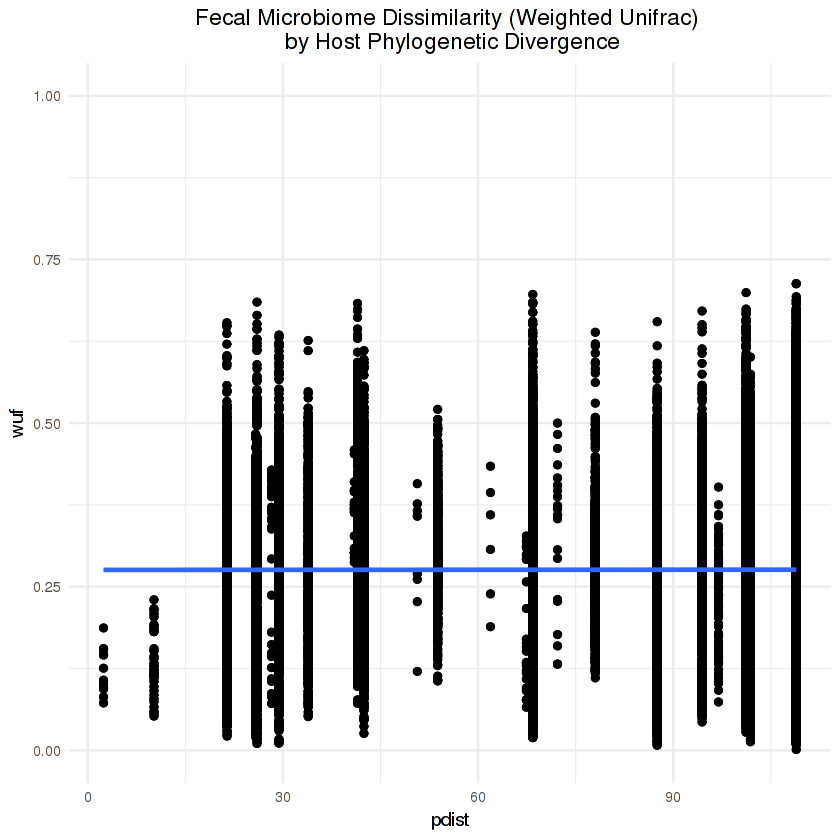

In [105]:
#Plot Host Phylogenetic divergence by microbial dissimilarity

p = ggplot(fecal_wuf_mt, aes(x=pdist, y=wuf)) + geom_point() + ggtitle("Fecal Microbiome Dissimilarity (Weighted Unifrac) \n by Host Phylogenetic Divergence")
p = p + geom_smooth(method = "lm")#, se=TRUE, alpha=.2)
p = p + scale_y_continuous(limits=c(0,1))
p = p + theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) 
p

Warning message:
“Removed 19594 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 19594 rows containing missing values (geom_point).”

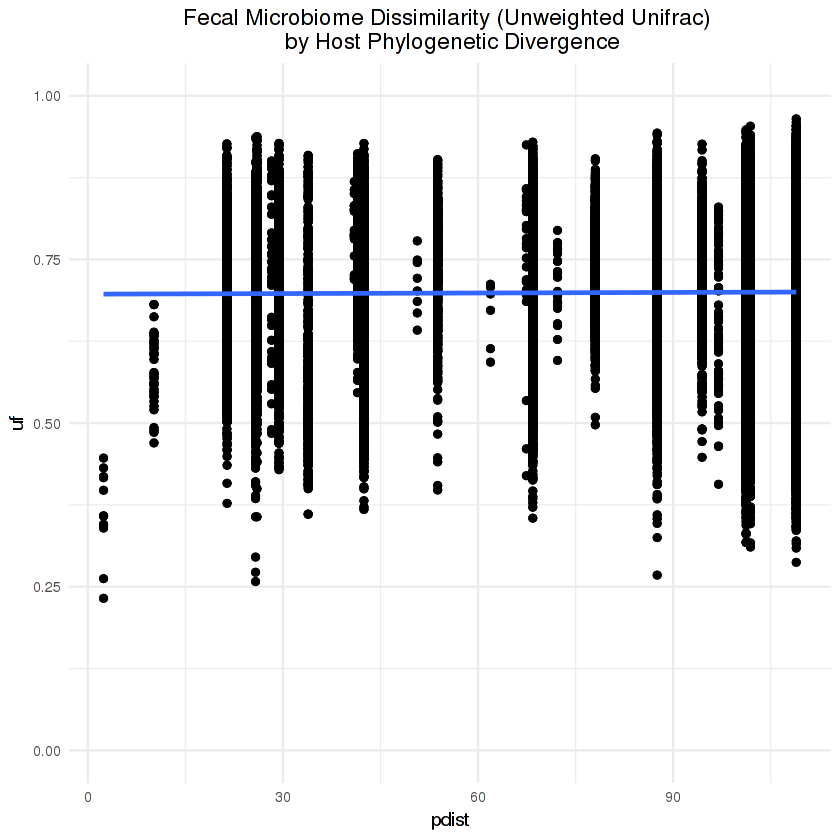

In [106]:
#Plot Host Phylogenetic divergence by microbial dissimilarity

p = ggplot(fecal_uf_mt, aes(x=pdist, y=uf)) + geom_point() + ggtitle("Fecal Microbiome Dissimilarity (Unweighted Unifrac) \n by Host Phylogenetic Divergence")
p = p + geom_smooth(method = "lm")#, se=TRUE, alpha=.2)
p = p + scale_y_continuous(limits=c(0,1))
p = p + theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) 
p

Warning message:
“Removed 19594 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 19594 rows containing missing values (geom_point).”

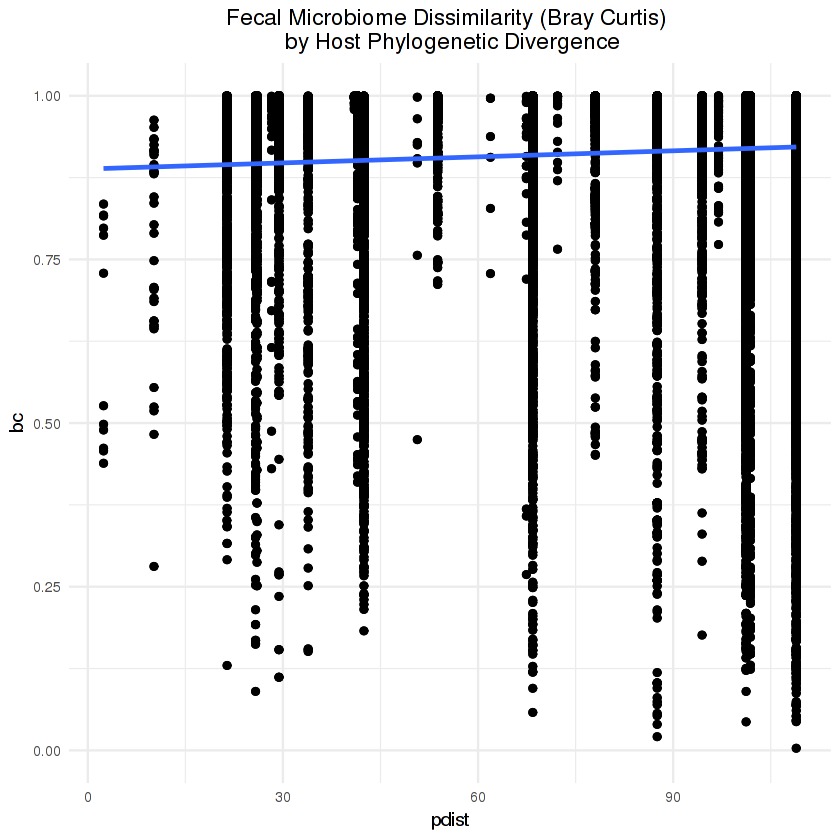

In [107]:
#Plot Host Phylogenetic divergence by microbial dissimilarity

p = ggplot(fecal_bc_mt, aes(x=pdist, y=bc)) + geom_point() + ggtitle("Fecal Microbiome Dissimilarity (Bray Curtis) \n by Host Phylogenetic Divergence")
p = p + geom_smooth(method = "lm")#, se=TRUE, alpha=.2)
p = p + scale_y_continuous(limits=c(0,1))
p = p + theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) 
p

Warning message:
“Removed 19739 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 19739 rows containing missing values (geom_point).”

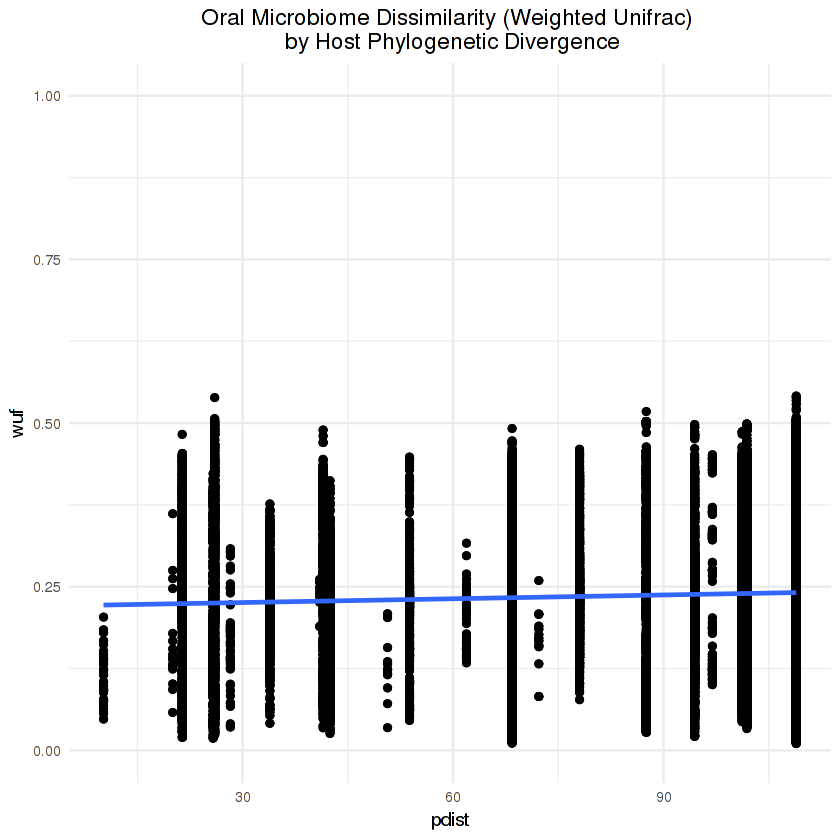

In [108]:
#Plot Host Phylogenetic divergence by microbial dissimilarity

p = ggplot(oral_wuf_mt, aes(x=pdist, y=wuf)) + geom_point() + ggtitle("Oral Microbiome Dissimilarity (Weighted Unifrac) \n by Host Phylogenetic Divergence")
p = p + geom_smooth(method = "lm")#, se=TRUE, alpha=.2)
p = p + scale_y_continuous(limits=c(0,1))
p = p + theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) 
p

Warning message:
“Removed 19739 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 19739 rows containing missing values (geom_point).”

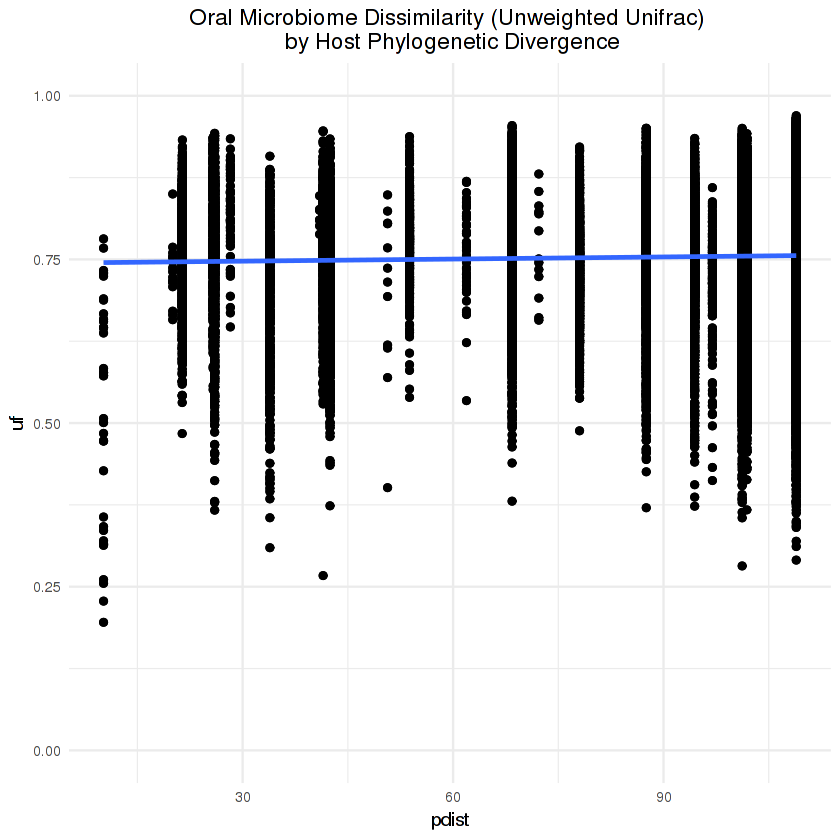

In [109]:
#Plot Host Phylogenetic divergence by microbial dissimilarity

p = ggplot(oral_uf_mt, aes(x=pdist, y=uf)) + geom_point() + ggtitle("Oral Microbiome Dissimilarity (Unweighted Unifrac) \n by Host Phylogenetic Divergence")
p = p + geom_smooth(method = "lm")#, se=TRUE, alpha=.2)
p = p + scale_y_continuous(limits=c(0,1))
p = p + theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) 
p

Warning message:
“Removed 19739 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 19739 rows containing missing values (geom_point).”

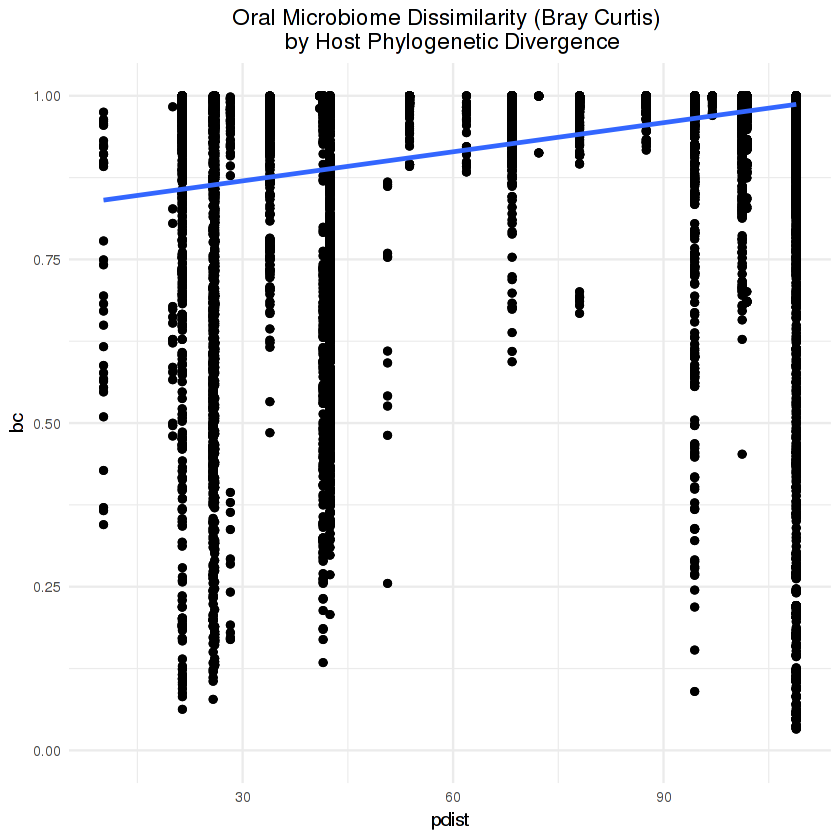

In [110]:
#Plot Host Phylogenetic divergence by microbial dissimilarity

p = ggplot(oral_bc_mt, aes(x=pdist, y=bc)) + geom_point() + ggtitle("Oral Microbiome Dissimilarity (Bray Curtis) \n by Host Phylogenetic Divergence")
p = p + geom_smooth(method = "lm")#, se=TRUE, alpha=.2)
p = p + scale_y_continuous(limits=c(0,1))
p = p + theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) 
p

Warning message:
“Removed 22236 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 22236 rows containing missing values (geom_point).”

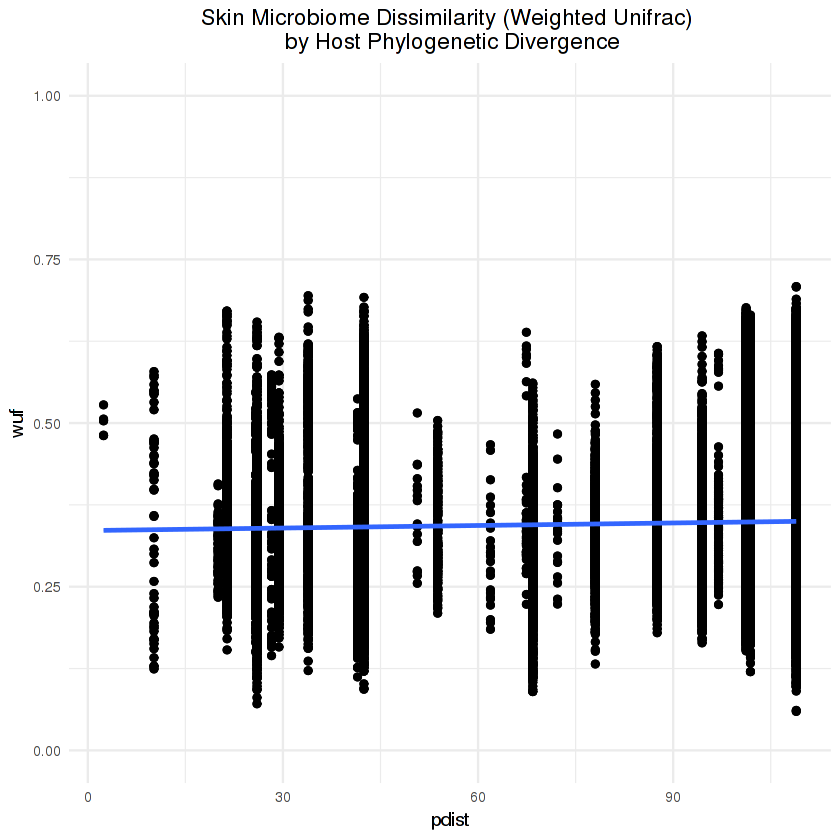

In [111]:
#Plot Host Phylogenetic divergence by microbial dissimilarity

p = ggplot(skin_wuf_mt, aes(x=pdist, y=wuf)) + geom_point() + ggtitle("Skin Microbiome Dissimilarity (Weighted Unifrac) \n by Host Phylogenetic Divergence")
p = p + geom_smooth(method = "lm")#, se=TRUE, alpha=.2)
p = p + scale_y_continuous(limits=c(0,1))
p = p + theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) 
p

Warning message:
“Removed 22236 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 22236 rows containing missing values (geom_point).”

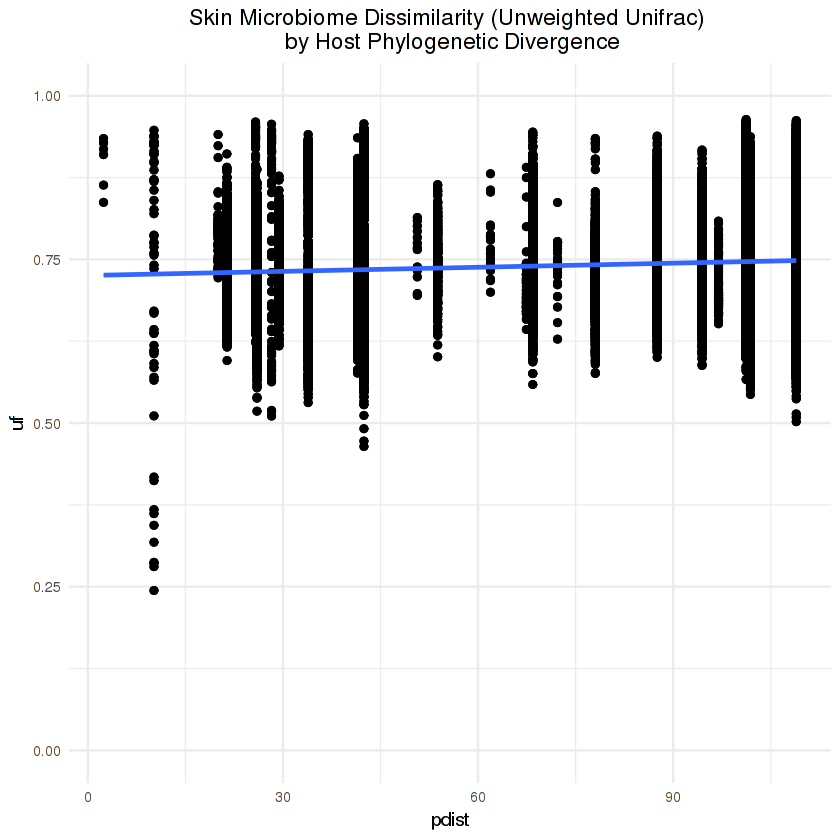

In [112]:
#Plot Host Phylogenetic divergence by microbial dissimilarity

p = ggplot(skin_uf_mt, aes(x=pdist, y=uf)) + geom_point() + ggtitle("Skin Microbiome Dissimilarity (Unweighted Unifrac) \n by Host Phylogenetic Divergence")
p = p + geom_smooth(method = "lm")#, se=TRUE, alpha=.2)
p = p + scale_y_continuous(limits=c(0,1))
p = p + theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) 
p

Warning message:
“Removed 22236 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 22236 rows containing missing values (geom_point).”

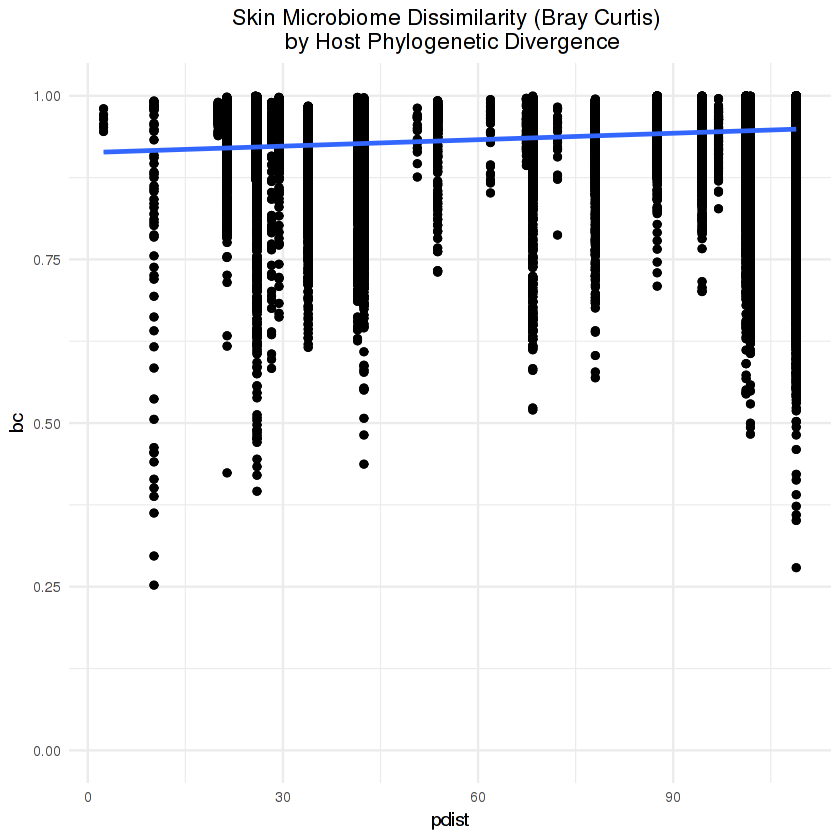

In [113]:
#Plot Host Phylogenetic divergence by microbial dissimilarity

p = ggplot(skin_bc_mt, aes(x=pdist, y=bc)) + geom_point() + ggtitle("Skin Microbiome Dissimilarity (Bray Curtis) \n by Host Phylogenetic Divergence")
p = p + geom_smooth(method = "lm")#, se=TRUE, alpha=.2)
p = p + scale_y_continuous(limits=c(0,1))
p = p + theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) 
p

### X - Former analysiswith non-ultrametric tree

#### ORAL Weighted Unifrac

In [136]:
wuf.df = melt(wuf)
brlen.df = melt(brlen)

wuf.df$hosts <- paste(wuf.df$X1,wuf.df$X2)
head(wuf.df)

brlen.df$hosts <- paste(brlen.df$X1,brlen.df$X2)
head(brlen.df)

oral.wuf.2plot = merge(wuf.df,brlen.df, by="hosts")
head(oral.wuf.2plot)

X1,X2,value,hosts
Chaerephon_bivitattus,Chaerephon_bivitattus,0.2277008,Chaerephon_bivitattus Chaerephon_bivitattus
Coleura_afra,Chaerephon_bivitattus,0.2614036,Coleura_afra Chaerephon_bivitattus
Epomophorus_wahlbergi,Chaerephon_bivitattus,0.2905886,Epomophorus_wahlbergi Chaerephon_bivitattus
Hipposideros_caffer,Chaerephon_bivitattus,0.2664002,Hipposideros_caffer Chaerephon_bivitattus
Hipposideros_camerunensis,Chaerephon_bivitattus,0.3072135,Hipposideros_camerunensis Chaerephon_bivitattus
Hipposideros_ruber,Chaerephon_bivitattus,0.4297126,Hipposideros_ruber Chaerephon_bivitattus


X1,X2,value,hosts
Chaerephon_bivittatus,Chaerephon_bivittatus,0.0000000,Chaerephon_bivittatus Chaerephon_bivittatus
Coleura_afra,Chaerephon_bivittatus,0.5357023,Coleura_afra Chaerephon_bivittatus
Epomophorus_wahlbergi,Chaerephon_bivittatus,0.5322959,Epomophorus_wahlbergi Chaerephon_bivittatus
Hipposideros_caffer,Chaerephon_bivittatus,0.5378077,Hipposideros_caffer Chaerephon_bivittatus
Hipposideros_camerunensis,Chaerephon_bivittatus,0.5589793,Hipposideros_camerunensis Chaerephon_bivittatus
Hipposideros_ruber,Chaerephon_bivittatus,0.5573593,Hipposideros_ruber Chaerephon_bivittatus


hosts,X1.x,X2.x,value.x,X1.y,X2.y,value.y
Coleura_afra Coleura_afra,Coleura_afra,Coleura_afra,0.02653857,Coleura_afra,Coleura_afra,0.0000000
Coleura_afra Epomophorus_wahlbergi,Coleura_afra,Epomophorus_wahlbergi,0.21311041,Coleura_afra,Epomophorus_wahlbergi,0.5251498
Coleura_afra Hipposideros_caffer,Coleura_afra,Hipposideros_caffer,0.12007650,Coleura_afra,Hipposideros_caffer,0.5306616
Coleura_afra Hipposideros_camerunensis,Coleura_afra,Hipposideros_camerunensis,0.34287185,Coleura_afra,Hipposideros_camerunensis,0.5518332
Coleura_afra Hipposideros_ruber,Coleura_afra,Hipposideros_ruber,0.44086843,Coleura_afra,Hipposideros_ruber,0.5502133
Coleura_afra Hipposideros_vittatus,Coleura_afra,Hipposideros_vittatus,0.27349819,Coleura_afra,Hipposideros_vittatus,0.5865795


Warning message:
“Removed 28 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 28 rows containing missing values (geom_point).”

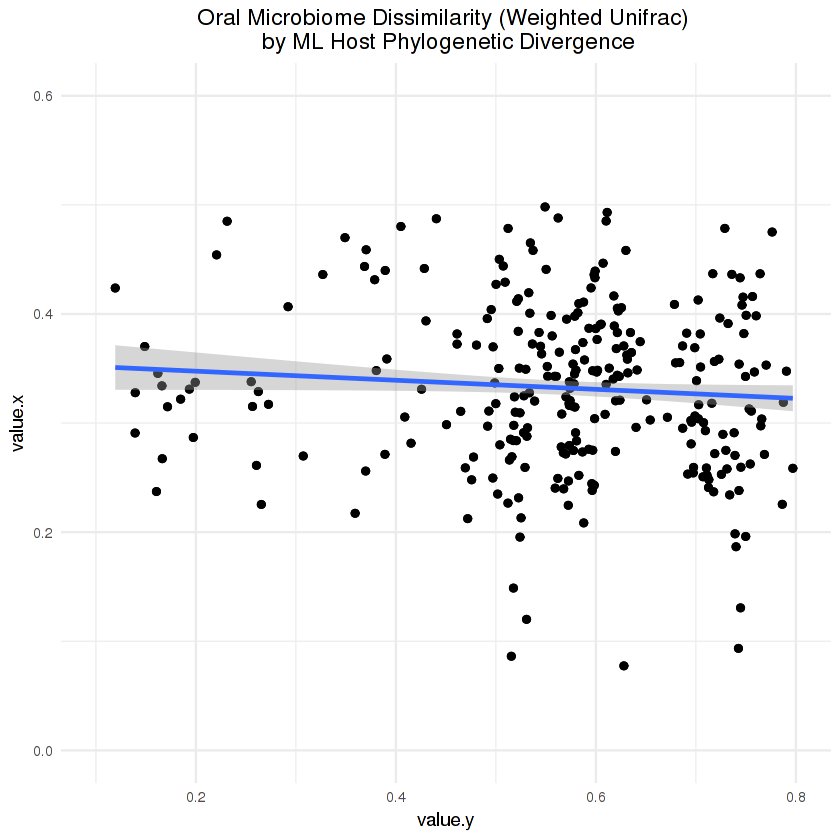

In [139]:
p = ggplot(oral.wuf.2plot, aes(x=value.y, y=value.x)) + geom_point() + ggtitle("Oral Microbiome Dissimilarity (Weighted Unifrac) \n by ML Host Phylogenetic Divergence")
p = p + geom_smooth(method = "lm")#, se=TRUE, alpha=.2)
p = p + theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) 
p = p + scale_y_continuous(limits=c(0,.6))
p = p + scale_x_continuous(limits=c(.1,.8))
p

#### SKIN Weighted Unifrac

In [36]:
head(skin_wuf_dist9)

Host1,Host2,wuf_dist
Otomops_martiensseni,Otomops_martiensseni,0
Rhinolophus_hildebrandti,Otomops_martiensseni,0.446196885
Rhinolophus_clivosus,Otomops_martiensseni,0.495721057
Rousettus_aegyptiacus,Otomops_martiensseni,0.432116356
Chaerephon_bivitattus,Otomops_martiensseni,0.37709941
Hipposideros_caffer,Otomops_martiensseni,0.452721098


In [39]:
skin_wuf_dist9$wuf_dist = as.numeric(skin_wuf_dist9$wuf_dist)

In [43]:
library(reshape2)
wuf = acast(skin_wuf_dist9, Host1~Host2, value.var='wuf_dist', fun.aggregate=mean)
brlen = acast(brlen7, HostA~HostB, value.var="value")
head(wuf)
head(brlen)

,Chaerephon_bivitattus,Coleura_afra,Epomophorus_labiatus,Epomophorus_wahlbergi,Hipposideros_caffer,Hipposideros_camerunensis,Hipposideros_ruber,Hipposideros_vittatus,Micropteropus_pusillus,Miniopterus_africanus,...,Otomops_martiensseni,Rhinolophus_clivosus,Rhinolophus_eloquens,Rhinolophus_hildebrandti,Rhinolophus_landeri,Rousettus_aegyptiacus,Scotoecus_hindei,Scotophilus_dinganii,Stenonycteris_lanosus,Triaenops_afer
Chaerephon_bivitattus,0.2356828,0.4409898,0.40454680,0.4628771,0.3966056,0.5142075,0.3711094,0.4728830,0.4762600,0.4151468,...,0.3668396,0.3621301,0.3993277,0.4118992,0.3981856,0.3785873,0.3701081,0.3731674,0.3581499,0.4382643
Coleura_afra,0.4409898,0.1448608,0.41374170,0.4327015,0.3741331,0.4826915,0.4305923,0.3046035,0.4625410,0.3879762,...,0.3842778,0.4314063,0.4013103,0.4420261,0.4240392,0.4253032,0.4620908,0.3316494,0.4202571,0.2521998
Epomophorus_labiatus,0.4045468,0.4137417,0.07160785,0.3555224,0.3627866,0.4405232,0.3636907,0.4482693,0.4615792,0.3991775,...,0.3578836,0.2972166,0.3724664,0.2446393,0.3473285,0.3574470,0.3811943,0.3241364,0.3018994,0.4061620
Epomophorus_wahlbergi,0.4628771,0.4327015,0.35552236,0.2701569,0.4375801,0.4461401,0.4232899,0.4990690,0.2540040,0.4716250,...,0.3876292,0.4095416,0.4776510,0.3965978,0.4588593,0.4474109,0.4208733,0.3213890,0.3825272,0.4515222
Hipposideros_caffer,0.3966056,0.3741331,0.36278660,0.4375801,0.3241481,0.4946590,0.3769467,0.4034193,0.4735546,0.4112800,...,0.3510539,0.3758996,0.3474281,0.3895398,0.3764227,0.4152754,0.4194921,0.3436233,0.4004469,0.3616938
Hipposideros_camerunensis,0.5142075,0.4826915,0.44052323,0.4461401,0.4946590,0.2368023,0.4851598,0.5095866,0.4560264,0.4933889,...,0.4828315,0.4598171,0.5067609,0.4501262,0.4975769,0.4686804,0.4756219,0.4274582,0.4565048,0.4961536


,Chaerephon_bivittatus,Coleura_afra,Epomophorus_labiatus,Epomophorus_wahlbergi,Hipposideros_caffer,Hipposideros_camerunensis,Hipposideros_ruber,Hipposideros_vittatus,Micropteropus_pusillus,Miniopterus_africanus,...,Otomops_martiensseni,Rhinolophus_clivosus,Rhinolophus_eloquens,Rhinolophus_hildebrandtii,Rhinolophus_landeri,Rousettus_aegyptiacus,Scotoecus_hindei,Scotophilus_dinganii,Stenonycteris_lanosus,Triaenops_afer
Chaerephon_bivittatus,0.0000000,0.5357023,0.53497791,0.53229587,0.5378077,0.5589793,0.5573593,0.5937255,0.53812970,0.5242274,...,0.2323180,0.5795459,0.5900843,0.6164588,0.5694004,0.5634081,0.6161937,0.6482385,0.5410945,0.5806153
Coleura_afra,0.5357023,0.0000000,0.52783187,0.52514983,0.5306616,0.5518332,0.5502133,0.5865795,0.53098365,0.5775725,...,0.5154576,0.5723998,0.5829383,0.6093128,0.5622543,0.5562621,0.7105260,0.7425708,0.5339485,0.5734692
Epomophorus_labiatus,0.5349779,0.5278319,0.00000000,0.05672011,0.4744829,0.4956545,0.4940345,0.5304007,0.01396906,0.5768481,...,0.5147332,0.5162211,0.5267596,0.5531340,0.5060756,0.2592944,0.7098017,0.7418464,0.1961440,0.5172905
Epomophorus_wahlbergi,0.5322959,0.5251498,0.05672011,0.00000000,0.4718009,0.4929724,0.4913525,0.5277187,0.05987190,0.5741661,...,0.5120512,0.5135391,0.5240775,0.5504520,0.5033936,0.2566123,0.7071196,0.7391644,0.1934620,0.5146085
Hipposideros_caffer,0.5378077,0.5306616,0.47448289,0.47180085,0.0000000,0.2726004,0.1193312,0.3073466,0.47763468,0.5796779,...,0.5175630,0.3592114,0.3697498,0.3961243,0.3490659,0.5029131,0.7126314,0.7446762,0.4805995,0.4088724
Hipposideros_camerunensis,0.5589793,0.5518332,0.49565448,0.49297244,0.2726004,0.0000000,0.2921520,0.2552815,0.49880627,0.6008495,...,0.5387346,0.3803830,0.3909214,0.4172959,0.3702375,0.5240847,0.7338030,0.7658478,0.5017711,0.4300440


In [44]:
skin.wuf.mantel = mantel(wuf, brlen, method="pearson", permutations=10000)
skin.wuf.mantel


Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = wuf, ydis = brlen, method = "pearson", permutations = 10000) 

Mantel statistic r: -0.08106 
      Significance: 0.79062 

Upper quantiles of permutations (null model):
  90%   95% 97.5%   99% 
0.126 0.163 0.203 0.243 
Permutation: free
Number of permutations: 10000


In [45]:
wuf.df = melt(wuf)
brlen.df = melt(brlen)

wuf.df$hosts <- paste(wuf.df$X1,wuf.df$X2)
head(wuf.df)

brlen.df$hosts <- paste(brlen.df$X1,brlen.df$X2)
head(brlen.df)

skin.wuf.2plot = merge(wuf.df,brlen.df, by="hosts")
head(skin.wuf.2plot)

X1,X2,value,hosts
Chaerephon_bivitattus,Chaerephon_bivitattus,0.2356828,Chaerephon_bivitattus Chaerephon_bivitattus
Coleura_afra,Chaerephon_bivitattus,0.4409898,Coleura_afra Chaerephon_bivitattus
Epomophorus_labiatus,Chaerephon_bivitattus,0.4045468,Epomophorus_labiatus Chaerephon_bivitattus
Epomophorus_wahlbergi,Chaerephon_bivitattus,0.4628771,Epomophorus_wahlbergi Chaerephon_bivitattus
Hipposideros_caffer,Chaerephon_bivitattus,0.3966056,Hipposideros_caffer Chaerephon_bivitattus
Hipposideros_camerunensis,Chaerephon_bivitattus,0.5142075,Hipposideros_camerunensis Chaerephon_bivitattus


X1,X2,value,hosts
Chaerephon_bivittatus,Chaerephon_bivittatus,0.0000000,Chaerephon_bivittatus Chaerephon_bivittatus
Coleura_afra,Chaerephon_bivittatus,0.5357023,Coleura_afra Chaerephon_bivittatus
Epomophorus_labiatus,Chaerephon_bivittatus,0.5349779,Epomophorus_labiatus Chaerephon_bivittatus
Epomophorus_wahlbergi,Chaerephon_bivittatus,0.5322959,Epomophorus_wahlbergi Chaerephon_bivittatus
Hipposideros_caffer,Chaerephon_bivittatus,0.5378077,Hipposideros_caffer Chaerephon_bivittatus
Hipposideros_camerunensis,Chaerephon_bivittatus,0.5589793,Hipposideros_camerunensis Chaerephon_bivittatus


hosts,X1.x,X2.x,value.x,X1.y,X2.y,value.y
Coleura_afra Coleura_afra,Coleura_afra,Coleura_afra,0.1448608,Coleura_afra,Coleura_afra,0.0000000
Coleura_afra Epomophorus_labiatus,Coleura_afra,Epomophorus_labiatus,0.4137417,Coleura_afra,Epomophorus_labiatus,0.5278319
Coleura_afra Epomophorus_wahlbergi,Coleura_afra,Epomophorus_wahlbergi,0.4327015,Coleura_afra,Epomophorus_wahlbergi,0.5251498
Coleura_afra Hipposideros_caffer,Coleura_afra,Hipposideros_caffer,0.3741331,Coleura_afra,Hipposideros_caffer,0.5306616
Coleura_afra Hipposideros_camerunensis,Coleura_afra,Hipposideros_camerunensis,0.4826915,Coleura_afra,Hipposideros_camerunensis,0.5518332
Coleura_afra Hipposideros_ruber,Coleura_afra,Hipposideros_ruber,0.4305923,Coleura_afra,Hipposideros_ruber,0.5502133


Warning message:
“Removed 33 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 33 rows containing missing values (geom_point).”

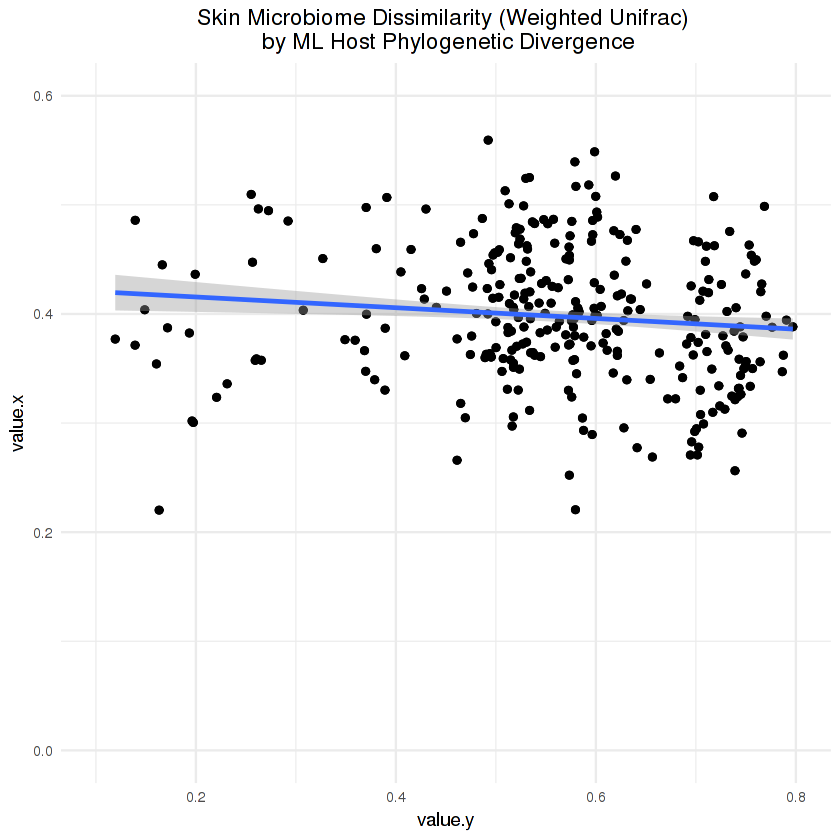

In [47]:
p = ggplot(skin.wuf.2plot, aes(x=value.y, y=value.x)) + geom_point() + ggtitle("Skin Microbiome Dissimilarity (Weighted Unifrac) \n by ML Host Phylogenetic Divergence")
p = p + geom_smooth(method = "lm")#, se=TRUE, alpha=.2)
p = p + theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) 
p = p + scale_y_continuous(limits=c(0,.6))
p = p + scale_x_continuous(limits=c(.1,.8))
p

In [11]:
fecal.bm.gls <- gls(wuf_dist~brlen, data=fecal_brlen.wunif)
summary(fecal.bm.gls)

Generalized least squares fit by REML
  Model: wuf_dist ~ brlen 
  Data: fecal_brlen.wunif 
        AIC      BIC   logLik
  -1469.303 -1456.77 737.6517

Coefficients:
                Value   Std.Error   t-value p-value
(Intercept) 0.1838887 0.006551693 28.067362       0
brlen       0.1173073 0.024970204  4.697891       0

 Correlation: 
      (Intr)
brlen -0.933

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-3.53900361 -0.54651058  0.03771899  0.65444992  2.47856812 

Residual standard error: 0.0519606 
Degrees of freedom: 484 total; 482 residual

### Plotting data

### Unweighted Unifrac

In [7]:
#fecal.uf = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/1_batfecal/batfecal.dist.unif_new.rds")
oral.uf = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/1_batoral/batoral.dist.unif_new.rds")
skin.uf = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/1_batskin/batskin.dist.unif_new.rds")

In [8]:
#batfecal_ID = read.csv("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/CSVfiles/batfecal_IDs.csv")
batoral_ID = read.csv("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/CSVfiles/oral_IDs.csv")
batskin_ID = read.csv("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Adiv/CSVfiles/skin_IDs.csv")


In [9]:
#fecal.uf.df = melt(as.matrix(fecal.unif))
oral.uf.df = melt(as.matrix(oral.uf))
skin.uf.df = melt(as.matrix(skin.uf))

In [10]:
brlen <- read.csv("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/PGLS_analyses/ML_constrained.csv", stringsAsFactors=TRUE)

In [11]:
brlen$Host_names <- NULL

In [148]:
head(oral.uf.df)
head(batoral_ID)

X1,X2,value
Rhinolophus_clivosus,Rhinolophus_clivosus,0.0000000
Hipposideros_caffer,Rhinolophus_clivosus,0.6239301
Hipposideros_caffer,Rhinolophus_clivosus,0.6785628
Myotis_tricolor,Rhinolophus_clivosus,0.7778515
Epomophorus_wahlbergi,Rhinolophus_clivosus,0.7092656
Otomops_martiensseni,Rhinolophus_clivosus,0.6402508


Sample,SampleType,Host_name
BN.593.TongueEtOH,TongueEtOH,Chaerephon_bivitattus
BN.594.TongueEtOH,TongueEtOH,Chaerephon_bivitattus
BN.595.TongueEtOH,TongueEtOH,Chaerephon_bivitattus
BN.596.TongueEtOH,TongueEtOH,Chaerephon_bivitattus
BN.597.TongueEtOH,TongueEtOH,Chaerephon_bivitattus
BN.598.TongueEtOH,TongueEtOH,Chaerephon_bivitattus


In [13]:
#fecal.uf.df$X1 <- batfecal_ID$Host_name[match(fecal.uf.df$X1, batfecal_ID$Sample)]
#fecal.uf.df$X2 <- batfecal_ID$Host_name[match(fecal.uf.df$X2, batfecal_ID$Sample)]
oral.uf.df$X1 <- batoral_ID$Host_name[match(oral.uf.df$X1, batoral_ID$Sample)]
oral.uf.df$X2 <- batoral_ID$Host_name[match(oral.uf.df$X2, batoral_ID$Sample)]
skin.uf.df$X1 <- batskin_ID$Host_name[match(skin.uf.df$X1, batskin_ID$Sample)]
skin.uf.df$X2 <- batskin_ID$Host_name[match(skin.uf.df$X2, batskin_ID$Sample)]

#head(fecal.uf.df)
head(oral.uf.df)
head(skin.uf.df)

X1,X2,value
Rhinolophus_clivosus,Rhinolophus_clivosus,0.0000000
Hipposideros_caffer,Rhinolophus_clivosus,0.6239301
Hipposideros_caffer,Rhinolophus_clivosus,0.6785628
Myotis_tricolor,Rhinolophus_clivosus,0.7778515
Epomophorus_wahlbergi,Rhinolophus_clivosus,0.7092656
Otomops_martiensseni,Rhinolophus_clivosus,0.6402508


X1,X2,value
Otomops_martiensseni,Otomops_martiensseni,0.0000000
Rhinolophus_hildebrandti,Otomops_martiensseni,0.8822474
Rhinolophus_clivosus,Otomops_martiensseni,0.9082303
Rousettus_aegyptiacus,Otomops_martiensseni,0.9058654
Chaerephon_bivitattus,Otomops_martiensseni,0.8165796
Hipposideros_caffer,Otomops_martiensseni,0.8355926


#### Fecal

In [133]:
head(as.factor(fecal.uf.df19$X2))
head(as.factor(brlen13$HostB))

[1] Rousettus_aegyptiacus Rousettus_aegyptiacus Rousettus_aegyptiacus
[4] Rousettus_aegyptiacus Rousettus_aegyptiacus Rousettus_aegyptiacus
23 Levels: Coleura_afra Epomophorus_wahlbergi ... Triaenops_afer

[1] Coleura_afra              Hipposideros_camerunensis
[3] Epomophorus_wahlbergi     Hipposideros_caffer      
[5] Hipposideros_ruber        Hipposideros_vittatus    
23 Levels: Coleura_afra Epomophorus_wahlbergi ... Triaenops_afer

In [114]:
#Rename species to match between matrices

fecal.uf.df19$X1 = as.character(fecal.uf.df19$X1)
fecal.uf.df19$X2 = as.character(fecal.uf.df19$X2)
fecal.uf.df19$X1[which(fecal.uf.df19$X1 == "Macronycteris_vittatus")] = "Hipposideros_vittatus"
fecal.uf.df19$X2[which(fecal.uf.df19$X2 == "Macronycteris_vittatus")] = "Hipposideros_vittatus"
fecal.uf.df19$X1 = as.factor(fecal.uf.df19$X1)
fecal.uf.df19$X2 = as.factor(fecal.uf.df19$X2)

In [89]:
fecal.uf.df$X1 = as.character(fecal.uf.df$X1)
fecal.uf.df2 <- fecal.uf.df[fecal.uf.df[,1]!="Neoromicia_sp 1",]
fecal.uf.df3 <- fecal.uf.df2[fecal.uf.df2[,1]!="Neoromicia_sp 2",]
fecal.uf.df4 <- fecal.uf.df3[fecal.uf.df3[,1]!="Nycteris_0",]
fecal.uf.df5 <- fecal.uf.df4[fecal.uf.df4[,1]!="Nycteris_sp",]
fecal.uf.df6 <- fecal.uf.df5[fecal.uf.df5[,1]!="Pipistrellus_sp",]
fecal.uf.df7 <- fecal.uf.df6[fecal.uf.df6[,1]!="Rhinolophus_sp",]
fecal.uf.df8 <- fecal.uf.df7[fecal.uf.df7[,1]!="Rhinolophus_sp.",]
fecal.uf.df9 <- fecal.uf.df8[fecal.uf.df8[,1]!="Pipistrellus_sp",] 
fecal.uf.df10 <- fecal.uf.df9[fecal.uf.df9[,1]!="Pipistrellus_sp.",]
fecal.uf.df10$X1 = as.factor(fecal.uf.df10$X1)

fecal.uf.df10$X2 = as.character(fecal.uf.df10$X2)
fecal.uf.df11 <- fecal.uf.df10[fecal.uf.df10[,2]!="Neoromicia_sp 1",]
fecal.uf.df12 <- fecal.uf.df11[fecal.uf.df11[,2]!="Neoromicia_sp 2",]
fecal.uf.df13 <- fecal.uf.df12[fecal.uf.df12[,2]!="Nycteris_0",]
fecal.uf.df14 <- fecal.uf.df13[fecal.uf.df13[,2]!="Nycteris_sp",]
fecal.uf.df15 <- fecal.uf.df14[fecal.uf.df14[,2]!="Pipistrellus_sp",]
fecal.uf.df16 <- fecal.uf.df15[fecal.uf.df15[,2]!="Rhinolophus_sp",]
fecal.uf.df17 <- fecal.uf.df16[fecal.uf.df16[,2]!="Rhinolophus_sp.",]
fecal.uf.df18 <- fecal.uf.df17[fecal.uf.df17[,2]!="Pipistrellus_sp",] 
fecal.uf.df19 <- fecal.uf.df18[fecal.uf.df18[,2]!="Pipistrellus_sp.",]
fecal.uf.df19$X2 = as.factor(fecal.uf.df19$X2)

In [123]:
#Remove rows based on column value, for individuals not represented in the matriHost
#Host1
brlen$HostA = as.character(brlen$HostA)
brlen2 <- brlen[brlen[,1]!="Chaerephon_bivittatus",]
brlen3 <- brlen2[brlen2[,1]!="Epomophorus_labiatus",]
brlen4 <- brlen3[brlen3[,1]!="Mus_musculus",]
brlen5 <- brlen4[brlen4[,1]!="Micropteropus_pusillus",]
brlen6 <- brlen5[brlen5[,1]!="Neoromicia_nanus",]
brlen7 <- brlen6[brlen6[,1]!="Rhinolophus_hildebrandtii",]
brlen7$HostA = as.factor(brlen7$HostA)
#Host2
brlen7$HostB = as.character(brlen7$HostB)
brlen8 <- brlen7[brlen7[,2]!="Chaerephon_bivittatus",]
brlen9 <- brlen8[brlen8[,2]!="Epomophorus_labiatus",]
brlen10 <- brlen9[brlen9[,2]!="Mus_musculus",]
brlen11 <- brlen10[brlen10[,2]!="Micropteropus_pusillus",]
brlen12 <- brlen11[brlen11[,2]!="Neoromicia_nanus",]
brlen13 <- brlen12[brlen12[,2]!="Rhinolophus_hildebrandtii",]
brlen13$HostB = as.factor(brlen13$HostB)

In [139]:
head(fecal.uf.df19$)
class(brlen13)

[1] "data.frame"

[1] "data.frame"

In [141]:
library(reshape2)
uf = acast(na.omit(fecal.uf.df19), X1~X2, value.var='value', fun.aggregate=mean)
brlen = acast(brlen13, HostA~HostB, value.var="brlen")
head(uf, n=50)
head(brlen, n=50)

,Coleura_afra,Epomophorus_wahlbergi,Hipposideros_caffer,Hipposideros_camerunensis,Hipposideros_ruber,Hipposideros_vittatus,Miniopterus_africanus,Miniopterus_inflatus,Miniopterus_minor,Miniopterus_natalensis,...,Nycteris_thebaica,Otomops_martiensseni,Rhinolophus_clivosus,Rhinolophus_eloquens,Rhinolophus_landeri,Rousettus_aegyptiacus,Scotoecus_hindei,Scotophilus_dinganii,Stenonycteris_lanosus,Triaenops_afer
Coleura_afra,0.4232366,0.6118624,0.6601368,0.7237541,0.6168737,0.6562745,0.6326882,0.5973859,0.6308916,0.6820763,...,0.6300474,0.6285697,0.6033894,0.6180951,0.7405230,0.6290492,0.6944894,0.6214901,0.6145869,0.6443978
Epomophorus_wahlbergi,0.6118624,0.4484452,0.6883504,0.7303879,0.6451233,0.7319203,0.6713686,0.6311299,0.7073203,0.7084127,...,0.6678837,0.6515526,0.6143421,0.6455214,0.7472812,0.6539223,0.6874158,0.6805811,0.5722023,0.6985897
Hipposideros_caffer,0.6601368,0.6883504,0.6885667,0.7649827,0.6872316,0.7325906,0.7041999,0.6877436,0.7103705,0.7337510,...,0.6916973,0.6934665,0.6974722,0.6902859,0.7505817,0.7128579,0.7370180,0.7190858,0.6918471,0.7254518
Hipposideros_camerunensis,0.7237541,0.7303879,0.7649827,0.2818718,0.7479766,0.7872033,0.7648647,0.7346295,0.7611599,0.7827103,...,0.7387498,0.7603951,0.7312478,0.7379891,0.7893244,0.7491473,0.7354360,0.7262173,0.7426228,0.7817061
Hipposideros_ruber,0.6168737,0.6451233,0.6872316,0.7479766,0.5872379,0.7198031,0.6819052,0.6271584,0.7004923,0.7100554,...,0.6789058,0.6621295,0.6518638,0.6544147,0.7499690,0.6876011,0.7183836,0.6860452,0.6405529,0.7192513
Hipposideros_vittatus,0.6562745,0.7319203,0.7325906,0.7872033,0.7198031,0.6003359,0.7207087,0.7178267,0.7120618,0.7583394,...,0.7228259,0.7275472,0.7273559,0.7224914,0.7750191,0.7052679,0.7577532,0.7156818,0.7239102,0.7176150
Miniopterus_africanus,0.6326882,0.6713686,0.7041999,0.7648647,0.6819052,0.7207087,0.6539730,0.6747042,0.6949117,0.7177219,...,0.6878878,0.6779407,0.6773909,0.6698922,0.7452355,0.6922451,0.7346032,0.7040205,0.6801841,0.7092208
Miniopterus_inflatus,0.5973859,0.6311299,0.6877436,0.7346295,0.6271584,0.7178267,0.6747042,0.5728911,0.6915152,0.7055800,...,0.6833712,0.6668171,0.6280883,0.6492354,0.7601596,0.6735269,0.7146507,0.6685254,0.6336612,0.7021493
Miniopterus_minor,0.6308916,0.7073203,0.7103705,0.7611599,0.7004923,0.7120618,0.6949117,0.6915152,0.6074707,0.7206230,...,0.6913013,0.7019362,0.7181048,0.6959060,0.7219433,0.7042207,0.7215783,0.7147567,0.7218351,0.6738524
Miniopterus_natalensis,0.6820763,0.7084127,0.7337510,0.7827103,0.7100554,0.7583394,0.7177219,0.7055800,0.7206230,0.7078866,...,0.7316864,0.7115002,0.7239745,0.7123196,0.7592618,0.7307021,0.7367673,0.7313998,0.7172468,0.7368202


,Coleura_afra,Epomophorus_wahlbergi,Hipposideros_caffer,Hipposideros_camerunensis,Hipposideros_ruber,Hipposideros_vittatus,Miniopterus_africanus,Miniopterus_inflatus,Miniopterus_minor,Miniopterus_natalensis,...,Nycteris_thebaica,Otomops_martiensseni,Rhinolophus_clivosus,Rhinolophus_eloquens,Rhinolophus_landeri,Rousettus_aegyptiacus,Scotoecus_hindei,Scotophilus_dinganii,Stenonycteris_lanosus,Triaenops_afer
Coleura_afra,0.0000000,0.5251498,0.5306616,0.5518332,0.5502133,0.5865795,0.5775725,0.5653365,0.5962946,0.5734896,...,0.5513870,0.5154576,0.5723998,0.5829383,0.5622543,0.5562621,0.7105260,0.7425708,0.5339485,0.5734692
Epomophorus_wahlbergi,0.5251498,0.0000000,0.4718009,0.4929724,0.4913525,0.5277187,0.5741661,0.5619301,0.5928883,0.5700832,...,0.5731448,0.5120512,0.5135391,0.5240775,0.5033936,0.2566123,0.7071196,0.7391644,0.1934620,0.5146085
Hipposideros_caffer,0.5306616,0.4718009,0.0000000,0.2726004,0.1193312,0.3073466,0.5796779,0.5674419,0.5984001,0.5755950,...,0.5786566,0.5175630,0.3592114,0.3697498,0.3490659,0.5029131,0.7126314,0.7446762,0.4805995,0.4088724
Hipposideros_camerunensis,0.5518332,0.4929724,0.2726004,0.0000000,0.2921520,0.2552815,0.6008495,0.5886135,0.6195717,0.5967666,...,0.5998282,0.5387346,0.3803830,0.3909214,0.3702375,0.5240847,0.7338030,0.7658478,0.5017711,0.4300440
Hipposideros_ruber,0.5502133,0.4913525,0.1193312,0.2921520,0.0000000,0.3268983,0.5992295,0.5869936,0.6179517,0.5951466,...,0.5982082,0.5371146,0.3787630,0.3893015,0.3686175,0.5224648,0.7321831,0.7642279,0.5001512,0.4284240
Hipposideros_vittatus,0.5865795,0.5277187,0.3073466,0.2552815,0.3268983,0.0000000,0.6355957,0.6233597,0.6543179,0.6315128,...,0.6345744,0.5734808,0.4151292,0.4256677,0.4049837,0.5588309,0.7685493,0.8005940,0.5365173,0.4647902
Miniopterus_africanus,0.5775725,0.5741661,0.5796779,0.6008495,0.5992295,0.6355957,0.0000000,0.1659902,0.1716209,0.1488158,...,0.6255674,0.5039827,0.6214161,0.6319545,0.6112706,0.6052783,0.6990512,0.7310959,0.5829647,0.6224855
Miniopterus_inflatus,0.5653365,0.5619301,0.5674419,0.5886135,0.5869936,0.6233597,0.1659902,0.0000000,0.1847124,0.1619073,...,0.6133314,0.4917468,0.6091801,0.6197186,0.5990346,0.5930424,0.6868152,0.7188600,0.5707288,0.6102495
Miniopterus_minor,0.5962946,0.5928883,0.5984001,0.6195717,0.6179517,0.6543179,0.1716209,0.1847124,0.0000000,0.1393061,...,0.6442896,0.5227049,0.6401383,0.6506767,0.6299928,0.6240005,0.7177734,0.7498181,0.6016869,0.6412077
Miniopterus_natalensis,0.5734896,0.5700832,0.5755950,0.5967666,0.5951466,0.6315128,0.1488158,0.1619073,0.1393061,0.0000000,...,0.6214845,0.4998998,0.6173332,0.6278717,0.6071877,0.6011954,0.6949683,0.7270131,0.5788819,0.6184026


In [142]:
fecal.uf.mantel = mantel(uf, brlen, method="pearson", permutations=10000)
fecal.uf.mantel


Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = uf, ydis = brlen, method = "pearson", permutations = 10000) 

Mantel statistic r: -0.0513 
      Significance: 0.63784 

Upper quantiles of permutations (null model):
  90%   95% 97.5%   99% 
0.169 0.216 0.258 0.310 
Permutation: free
Number of permutations: 10000


In [144]:
uf.df = melt(uf)
brlen.df = melt(brlen)

uf.df$hosts <- paste(uf.df$X1,uf.df$X2)
head(uf.df)

brlen.df$hosts <- paste(brlen.df$X1,brlen.df$X2)
head(brlen.df)

fecal.uf.2plot = merge(uf.df,brlen.df, by="hosts")
head(fecal.uf.2plot)

X1,X2,value,hosts
Coleura_afra,Coleura_afra,0.4232366,Coleura_afra Coleura_afra
Epomophorus_wahlbergi,Coleura_afra,0.6118624,Epomophorus_wahlbergi Coleura_afra
Hipposideros_caffer,Coleura_afra,0.6601368,Hipposideros_caffer Coleura_afra
Hipposideros_camerunensis,Coleura_afra,0.7237541,Hipposideros_camerunensis Coleura_afra
Hipposideros_ruber,Coleura_afra,0.6168737,Hipposideros_ruber Coleura_afra
Hipposideros_vittatus,Coleura_afra,0.6562745,Hipposideros_vittatus Coleura_afra


X1,X2,value,hosts
Coleura_afra,Coleura_afra,0.0000000,Coleura_afra Coleura_afra
Epomophorus_wahlbergi,Coleura_afra,0.5251498,Epomophorus_wahlbergi Coleura_afra
Hipposideros_caffer,Coleura_afra,0.5306616,Hipposideros_caffer Coleura_afra
Hipposideros_camerunensis,Coleura_afra,0.5518332,Hipposideros_camerunensis Coleura_afra
Hipposideros_ruber,Coleura_afra,0.5502133,Hipposideros_ruber Coleura_afra
Hipposideros_vittatus,Coleura_afra,0.5865795,Hipposideros_vittatus Coleura_afra


hosts,X1.x,X2.x,value.x,X1.y,X2.y,value.y
Coleura_afra Coleura_afra,Coleura_afra,Coleura_afra,0.4232366,Coleura_afra,Coleura_afra,0.0000000
Coleura_afra Epomophorus_wahlbergi,Coleura_afra,Epomophorus_wahlbergi,0.6118624,Coleura_afra,Epomophorus_wahlbergi,0.5251498
Coleura_afra Hipposideros_caffer,Coleura_afra,Hipposideros_caffer,0.6601368,Coleura_afra,Hipposideros_caffer,0.5306616
Coleura_afra Hipposideros_camerunensis,Coleura_afra,Hipposideros_camerunensis,0.7237541,Coleura_afra,Hipposideros_camerunensis,0.5518332
Coleura_afra Hipposideros_ruber,Coleura_afra,Hipposideros_ruber,0.6168737,Coleura_afra,Hipposideros_ruber,0.5502133
Coleura_afra Hipposideros_vittatus,Coleura_afra,Hipposideros_vittatus,0.6562745,Coleura_afra,Hipposideros_vittatus,0.5865795


Warning message:
“Removed 25 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 25 rows containing missing values (geom_point).”

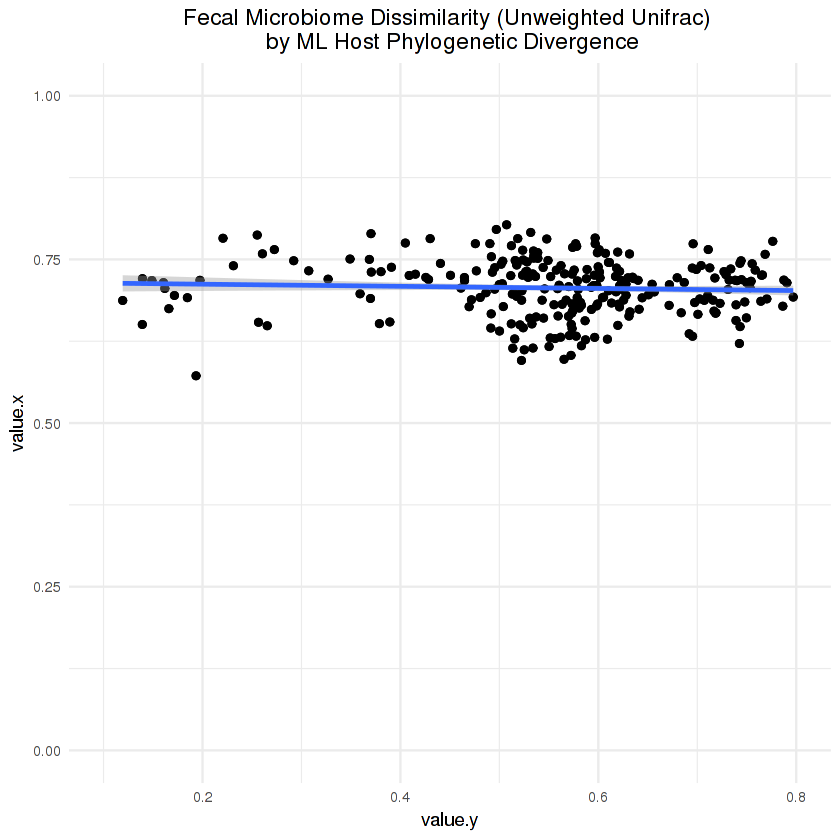

In [147]:
p = ggplot(fecal.uf.2plot, aes(x=value.y, y=value.x)) + geom_point() + ggtitle("Fecal Microbiome Dissimilarity (Unweighted Unifrac) \n by ML Host Phylogenetic Divergence")
p = p + geom_smooth(method = "lm")#, se=TRUE, alpha=.2)
p = p + theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) 
p = p + scale_y_continuous(limits=c(0,1))
p = p + scale_x_continuous(limits=c(.1,.8))
p

#### Oral

In [23]:
head(as.factor(oral.uf.df19$X1))
head(as.factor(brlen13$HostA))

[1] Rhinolophus_clivosus  Hipposideros_caffer   Hipposideros_caffer  
[4] Myotis_tricolor       Epomophorus_wahlbergi Otomops_martiensseni 
26 Levels: Chaerephon_bivitattus Coleura_afra ... Triaenops_afer

[1] Chaerephon_bivittatus Chaerephon_bivittatus Chaerephon_bivittatus
[4] Chaerephon_bivittatus Chaerephon_bivittatus Chaerephon_bivittatus
26 Levels: Chaerephon_bivittatus Coleura_afra ... Triaenops_afer

In [19]:
#Rename species to match between matrices

oral.uf.df$X1 = as.character(oral.uf.df$X1)
oral.uf.df$X2 = as.character(oral.uf.df$X2)
oral.uf.df$X1[which(oral.uf.df$X1 == "Rousettus_lanosus")] = "Stenonycteris_lanosus"
oral.uf.df$X2[which(oral.uf.df$X2 == "Rousettus_lanosus")] = "Stenonycteris_lanosus"
oral.uf.df$X1 = as.factor(oral.uf.df$X1)
oral.uf.df$X2 = as.factor(oral.uf.df$X2)

In [21]:
oral.uf.df$X1 = as.character(oral.uf.df$X1)
oral.uf.df2 <- oral.uf.df[oral.uf.df[,1]!="Neoromicia_sp",]
oral.uf.df3 <- oral.uf.df2[oral.uf.df2[,1]!="Nycteris_arge or thebaica",]
oral.uf.df4 <- oral.uf.df3[oral.uf.df3[,1]!="Pipistrellus_sp",]
oral.uf.df5 <- oral.uf.df4[oral.uf.df4[,1]!="Rhinolophus_sp",]
oral.uf.df6 <- oral.uf.df5[oral.uf.df5[,1]!="Nycteris_arge",]
oral.uf.df7 <- oral.uf.df6[oral.uf.df6[,1]!="Nycteris_arge",]
oral.uf.df8 <- oral.uf.df7[oral.uf.df7[,1]!="Nycteris_arge",]
oral.uf.df9 <- oral.uf.df8[oral.uf.df8[,1]!="Nycteris_arge",] 
oral.uf.df10 <- oral.uf.df9[oral.uf.df9[,1]!="Nycteris_arge",]
oral.uf.df10$X1 = as.factor(oral.uf.df10$X1)

oral.uf.df10$X2 = as.character(oral.uf.df10$X2)
oral.uf.df11 <- oral.uf.df10[oral.uf.df10[,2]!="Neoromicia_sp",]
oral.uf.df12 <- oral.uf.df11[oral.uf.df11[,2]!="Nycteris_arge or thebaica",]
oral.uf.df13 <- oral.uf.df12[oral.uf.df12[,2]!="Pipistrellus_sp",]
oral.uf.df14 <- oral.uf.df13[oral.uf.df13[,2]!="Rhinolophus_sp",]
oral.uf.df15 <- oral.uf.df14[oral.uf.df14[,2]!="Nycteris_arge",]
oral.uf.df16 <- oral.uf.df15[oral.uf.df15[,2]!="Nycteris_arge",]
oral.uf.df17 <- oral.uf.df16[oral.uf.df16[,2]!="Nycteris_arge",]
oral.uf.df18 <- oral.uf.df17[oral.uf.df17[,2]!="Nycteris_arge",] 
oral.uf.df19 <- oral.uf.df18[oral.uf.df18[,2]!="Nycteris_arge",]
oral.uf.df19$X2 = as.factor(oral.uf.df19$X2)

In [22]:
#Remove rows based on column value, for individuals not represented in the matriHost
#Host1
brlen$HostA = as.character(brlen$HostA)
brlen2 <- brlen[brlen[,1]!="Epomophorus_labiatus",]
brlen3 <- brlen2[brlen2[,1]!="Epomophorus_labiatus",]
brlen4 <- brlen3[brlen3[,1]!="Nycteris_arge",]
brlen5 <- brlen4[brlen4[,1]!="Mus_musculus",]
brlen6 <- brlen5[brlen5[,1]!="Mus_musculus",]
brlen7 <- brlen6[brlen6[,1]!="Mus_musculus",]
brlen7$HostA = as.factor(brlen7$HostA)
#Host2
brlen7$HostB = as.character(brlen7$HostB)
brlen8 <- brlen7[brlen7[,2]!="Epomophorus_labiatus",]
brlen9 <- brlen8[brlen8[,2]!="Epomophorus_labiatus",]
brlen10 <- brlen9[brlen9[,2]!="Nycteris_arge",]
brlen11 <- brlen10[brlen10[,2]!="Mus_musculus",]
brlen12 <- brlen11[brlen11[,2]!="Mus_musculus",]
brlen13 <- brlen12[brlen12[,2]!="Mus_musculus",]
brlen13$HostB = as.factor(brlen13$HostB)

In [24]:
library(reshape2)
uf = acast(na.omit(oral.uf.df19), X1~X2, value.var='value', fun.aggregate=mean)
brlen = acast(brlen13, HostA~HostB, value.var="brlen")
head(uf)
head(brlen)


Attaching package: ‘reshape2’

The following objects are masked from ‘package:reshape’:

    colsplit, melt, recast

The following objects are masked from ‘package:data.table’:

    dcast, melt



,Chaerephon_bivitattus,Coleura_afra,Epomophorus_wahlbergi,Hipposideros_caffer,Hipposideros_camerunensis,Hipposideros_ruber,Hipposideros_vittatus,Micropteropus_pusillus,Miniopterus_africanus,Miniopterus_inflatus,...,Otomops_martiensseni,Rhinolophus_clivosus,Rhinolophus_eloquens,Rhinolophus_hildebrandti,Rhinolophus_landeri,Rousettus_aegyptiacus,Scotoecus_hindei,Scotophilus_dinganii,Stenonycteris_lanosus,Triaenops_afer
Chaerephon_bivitattus,0.5405126,0.6987674,0.7097365,0.7243197,0.8381585,0.7745778,0.7575943,0.6955798,0.7424292,0.7404805,...,0.7045711,0.7811461,0.7088702,0.7498814,0.7936426,0.7067633,0.6767423,0.7638874,0.7199392,0.7334793
Coleura_afra,0.6987674,0.4448362,0.6208803,0.6643695,0.8187719,0.6948346,0.7025363,0.6129195,0.6632039,0.6436252,...,0.6917041,0.7558632,0.6820246,0.7263544,0.7451218,0.7006265,0.7018214,0.7719288,0.6373117,0.6552190
Epomophorus_wahlbergi,0.7097365,0.6208803,0.5388422,0.7046881,0.8405167,0.7543142,0.7854655,0.5301985,0.6866410,0.6611058,...,0.6685044,0.7696720,0.7166860,0.7688010,0.7834777,0.7070800,0.6727199,0.7424664,0.6452949,0.7459936
Hipposideros_caffer,0.7243197,0.6643695,0.7046881,0.6815064,0.8249396,0.7342544,0.7660984,0.7077737,0.7224450,0.7125253,...,0.7196312,0.7792234,0.7008324,0.7336505,0.7602188,0.7353991,0.7411979,0.7865183,0.7194044,0.7020621
Hipposideros_camerunensis,0.8381585,0.8187719,0.8405167,0.8249396,0.0000000,0.7526985,0.8125362,0.8500396,0.8617117,0.8255713,...,0.8869389,0.7585913,0.8440218,0.8223785,0.7992617,0.8236927,0.8864268,0.9264398,0.7783660,0.7902251
Hipposideros_ruber,0.7745778,0.6948346,0.7543142,0.7342544,0.7526985,0.6116358,0.7711971,0.7725167,0.7696225,0.7260655,...,0.8032127,0.7580345,0.7541709,0.7465217,0.7384119,0.7720661,0.8101211,0.8731606,0.7146027,0.7177731


,Chaerephon_bivittatus,Coleura_afra,Epomophorus_wahlbergi,Hipposideros_caffer,Hipposideros_camerunensis,Hipposideros_ruber,Hipposideros_vittatus,Micropteropus_pusillus,Miniopterus_africanus,Miniopterus_inflatus,...,Otomops_martiensseni,Rhinolophus_clivosus,Rhinolophus_eloquens,Rhinolophus_hildebrandtii,Rhinolophus_landeri,Rousettus_aegyptiacus,Scotoecus_hindei,Scotophilus_dinganii,Stenonycteris_lanosus,Triaenops_afer
Chaerephon_bivittatus,0.0000000,0.5357023,0.5322959,0.5378077,0.5589793,0.5573593,0.5937255,0.5381297,0.5242274,0.5119914,...,0.2323180,0.5795459,0.5900843,0.6164588,0.5694004,0.5634081,0.6161937,0.6482385,0.5410945,0.5806153
Coleura_afra,0.5357023,0.0000000,0.5251498,0.5306616,0.5518332,0.5502133,0.5865795,0.5309837,0.5775725,0.5653365,...,0.5154576,0.5723998,0.5829383,0.6093128,0.5622543,0.5562621,0.7105260,0.7425708,0.5339485,0.5734692
Epomophorus_wahlbergi,0.5322959,0.5251498,0.0000000,0.4718009,0.4929724,0.4913525,0.5277187,0.0598719,0.5741661,0.5619301,...,0.5120512,0.5135391,0.5240775,0.5504520,0.5033936,0.2566123,0.7071196,0.7391644,0.1934620,0.5146085
Hipposideros_caffer,0.5378077,0.5306616,0.4718009,0.0000000,0.2726004,0.1193312,0.3073466,0.4776347,0.5796779,0.5674419,...,0.5175630,0.3592114,0.3697498,0.3961243,0.3490659,0.5029131,0.7126314,0.7446762,0.4805995,0.4088724
Hipposideros_camerunensis,0.5589793,0.5518332,0.4929724,0.2726004,0.0000000,0.2921520,0.2552815,0.4988063,0.6008495,0.5886135,...,0.5387346,0.3803830,0.3909214,0.4172959,0.3702375,0.5240847,0.7338030,0.7658478,0.5017711,0.4300440
Hipposideros_ruber,0.5573593,0.5502133,0.4913525,0.1193312,0.2921520,0.0000000,0.3268983,0.4971863,0.5992295,0.5869936,...,0.5371146,0.3787630,0.3893015,0.4156759,0.3686175,0.5224648,0.7321831,0.7642279,0.5001512,0.4284240


In [25]:
oral.uf.mantel = mantel(uf, brlen, method="pearson", permutations=10000)
oral.uf.mantel


Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = uf, ydis = brlen, method = "pearson", permutations = 10000) 

Mantel statistic r: 0.2233 
      Significance: 0.019898 

Upper quantiles of permutations (null model):
  90%   95% 97.5%   99% 
0.133 0.175 0.211 0.256 
Permutation: free
Number of permutations: 10000


In [26]:
uf.df = melt(uf)
brlen.df = melt(brlen)

uf.df$hosts <- paste(uf.df$X1,uf.df$X2)
head(uf.df)

brlen.df$hosts <- paste(brlen.df$X1,brlen.df$X2)
head(brlen.df)

oral.uf.2plot = merge(uf.df,brlen.df, by="hosts")
head(oral.uf.2plot)

X1,X2,value,hosts
Chaerephon_bivitattus,Chaerephon_bivitattus,0.5405126,Chaerephon_bivitattus Chaerephon_bivitattus
Coleura_afra,Chaerephon_bivitattus,0.6987674,Coleura_afra Chaerephon_bivitattus
Epomophorus_wahlbergi,Chaerephon_bivitattus,0.7097365,Epomophorus_wahlbergi Chaerephon_bivitattus
Hipposideros_caffer,Chaerephon_bivitattus,0.7243197,Hipposideros_caffer Chaerephon_bivitattus
Hipposideros_camerunensis,Chaerephon_bivitattus,0.8381585,Hipposideros_camerunensis Chaerephon_bivitattus
Hipposideros_ruber,Chaerephon_bivitattus,0.7745778,Hipposideros_ruber Chaerephon_bivitattus


X1,X2,value,hosts
Chaerephon_bivittatus,Chaerephon_bivittatus,0.0000000,Chaerephon_bivittatus Chaerephon_bivittatus
Coleura_afra,Chaerephon_bivittatus,0.5357023,Coleura_afra Chaerephon_bivittatus
Epomophorus_wahlbergi,Chaerephon_bivittatus,0.5322959,Epomophorus_wahlbergi Chaerephon_bivittatus
Hipposideros_caffer,Chaerephon_bivittatus,0.5378077,Hipposideros_caffer Chaerephon_bivittatus
Hipposideros_camerunensis,Chaerephon_bivittatus,0.5589793,Hipposideros_camerunensis Chaerephon_bivittatus
Hipposideros_ruber,Chaerephon_bivittatus,0.5573593,Hipposideros_ruber Chaerephon_bivittatus


hosts,X1.x,X2.x,value.x,X1.y,X2.y,value.y
Coleura_afra Coleura_afra,Coleura_afra,Coleura_afra,0.4448362,Coleura_afra,Coleura_afra,0.0000000
Coleura_afra Epomophorus_wahlbergi,Coleura_afra,Epomophorus_wahlbergi,0.6208803,Coleura_afra,Epomophorus_wahlbergi,0.5251498
Coleura_afra Hipposideros_caffer,Coleura_afra,Hipposideros_caffer,0.6643695,Coleura_afra,Hipposideros_caffer,0.5306616
Coleura_afra Hipposideros_camerunensis,Coleura_afra,Hipposideros_camerunensis,0.8187719,Coleura_afra,Hipposideros_camerunensis,0.5518332
Coleura_afra Hipposideros_ruber,Coleura_afra,Hipposideros_ruber,0.6948346,Coleura_afra,Hipposideros_ruber,0.5502133
Coleura_afra Hipposideros_vittatus,Coleura_afra,Hipposideros_vittatus,0.7025363,Coleura_afra,Hipposideros_vittatus,0.5865795


Warning message:
“Removed 28 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 28 rows containing missing values (geom_point).”

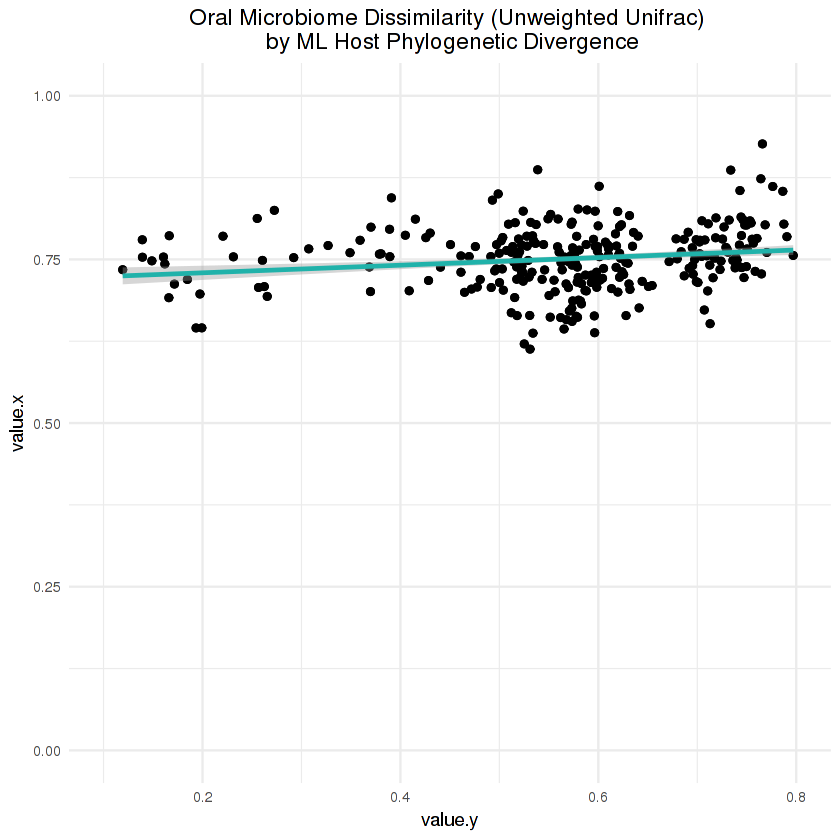

In [34]:
p = ggplot(oral.uf.2plot, aes(x=value.y, y=value.x)) + geom_point() + ggtitle("Oral Microbiome Dissimilarity (Unweighted Unifrac) \n by ML Host Phylogenetic Divergence")
p = p + geom_smooth(method = "lm", colour = "lightseagreen")#, se=TRUE, alpha=.2)
p = p + theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) 
p = p + scale_y_continuous(limits=c(0,1))
p = p + scale_x_continuous(limits=c(0.1,.8))
p

#### Skin

In [27]:
head(as.factor(skin.uf.df19$X1))
head(as.factor(brlen13$HostA))

[1] Otomops_martiensseni     Rhinolophus_hildebrandti Rhinolophus_clivosus    
[4] Rousettus_aegyptiacus    Chaerephon_bivitattus    Hipposideros_caffer     
27 Levels: Chaerephon_bivitattus Coleura_afra ... Triaenops_afer

[1] Chaerephon_bivittatus Chaerephon_bivittatus Chaerephon_bivittatus
[4] Chaerephon_bivittatus Chaerephon_bivittatus Chaerephon_bivittatus
27 Levels: Chaerephon_bivittatus Coleura_afra ... Triaenops_afer

In [18]:
#Rename species to match between matrices

skin.uf.df$X1 = as.character(skin.uf.df$X1)
skin.uf.df$X2 = as.character(skin.uf.df$X2)
skin.uf.df$X1[which(skin.uf.df$X1 == "Miniopterus_inflatus rufus")] = "Miniopterus_inflatus"
skin.uf.df$X2[which(skin.uf.df$X2 == "Miniopterus_inflatus rufus")] = "Miniopterus_inflatus"
skin.uf.df$X1 = as.factor(skin.uf.df$X1)
skin.uf.df$X2 = as.factor(skin.uf.df$X2)

In [24]:
skin.uf.df$X1 = as.character(skin.uf.df$X1)
skin.uf.df2 <- skin.uf.df[skin.uf.df[,1]!="Neoromicia_sp",]
skin.uf.df3 <- skin.uf.df2[skin.uf.df2[,1]!="Nycteris_arge or thebaica",]
skin.uf.df4 <- skin.uf.df3[skin.uf.df3[,1]!="Pipistrellus_sp",]
skin.uf.df5 <- skin.uf.df4[skin.uf.df4[,1]!="Rhinolophus_sp",]
skin.uf.df6 <- skin.uf.df5[skin.uf.df5[,1]!="Nycteris_sp",]
skin.uf.df7 <- skin.uf.df6[skin.uf.df6[,1]!="Nycteris_arge",]
skin.uf.df8 <- skin.uf.df7[skin.uf.df7[,1]!="Nycteris_arge",]
skin.uf.df9 <- skin.uf.df8[skin.uf.df8[,1]!="Nycteris_arge",] 
skin.uf.df10 <- skin.uf.df9[skin.uf.df9[,1]!="Nycteris_arge",]
skin.uf.df10$X1 = as.factor(skin.uf.df10$X1)

skin.uf.df10$X2 = as.character(skin.uf.df10$X2)
skin.uf.df11 <- skin.uf.df10[skin.uf.df10[,2]!="Neoromicia_sp",]
skin.uf.df12 <- skin.uf.df11[skin.uf.df11[,2]!="Nycteris_arge or thebaica",]
skin.uf.df13 <- skin.uf.df12[skin.uf.df12[,2]!="Pipistrellus_sp",]
skin.uf.df14 <- skin.uf.df13[skin.uf.df13[,2]!="Rhinolophus_sp",]
skin.uf.df15 <- skin.uf.df14[skin.uf.df14[,2]!="Nycteris_sp",]
skin.uf.df16 <- skin.uf.df15[skin.uf.df15[,2]!="Nycteris_arge",]
skin.uf.df17 <- skin.uf.df16[skin.uf.df16[,2]!="Nycteris_arge",]
skin.uf.df18 <- skin.uf.df17[skin.uf.df17[,2]!="Nycteris_arge",] 
skin.uf.df19 <- skin.uf.df18[skin.uf.df18[,2]!="Nycteris_arge",]
skin.uf.df19$X2 = as.factor(skin.uf.df19$X2)

In [28]:
#Remove rows based on column value, for individuals not represented in the matriHost
#Host1
brlen$HostA = as.character(brlen$HostA)
brlen2 <- brlen[brlen[,1]!="Nycteris_arge",]
brlen3 <- brlen2[brlen2[,1]!="Mus_musculus",]
brlen4 <- brlen3[brlen3[,1]!="Mus_musculus",]
brlen5 <- brlen4[brlen4[,1]!="Mus_musculus",]
brlen6 <- brlen5[brlen5[,1]!="Mus_musculus",]
brlen7 <- brlen6[brlen6[,1]!="Mus_musculus",]
brlen7$HostA = as.factor(brlen7$HostA)
#Host2
brlen7$HostB = as.character(brlen7$HostB)
brlen8 <- brlen7[brlen7[,2]!="Nycteris_arge",]
brlen9 <- brlen8[brlen8[,2]!="Mus_musculus",]
brlen10 <- brlen9[brlen9[,2]!="Mus_musculus",]
brlen11 <- brlen10[brlen10[,2]!="Mus_musculus",]
brlen12 <- brlen11[brlen11[,2]!="Neoromicia_nanus",]
brlen13 <- brlen12[brlen12[,2]!="Mus_musculus",]
brlen13$HostB = as.factor(brlen13$HostB)

In [29]:
library(reshape2)
uf = acast(na.omit(skin.uf.df19), X1~X2, value.var='value', fun.aggregate=mean)
brlen = acast(brlen13, HostA~HostB, value.var="brlen")
head(uf)
head(brlen)


Attaching package: ‘reshape2’

The following objects are masked from ‘package:reshape’:

    colsplit, melt, recast

The following objects are masked from ‘package:data.table’:

    dcast, melt



,Chaerephon_bivitattus,Coleura_afra,Epomophorus_labiatus,Epomophorus_wahlbergi,Hipposideros_caffer,Hipposideros_camerunensis,Hipposideros_ruber,Hipposideros_vittatus,Micropteropus_pusillus,Miniopterus_africanus,...,Otomops_martiensseni,Rhinolophus_clivosus,Rhinolophus_eloquens,Rhinolophus_hildebrandti,Rhinolophus_landeri,Rousettus_aegyptiacus,Scotoecus_hindei,Scotophilus_dinganii,Stenonycteris_lanosus,Triaenops_afer
Chaerephon_bivitattus,0.5271023,0.7348907,0.7891532,0.7971919,0.7507554,0.8175856,0.7685429,0.7684371,0.8019135,0.7664547,...,0.7269718,0.7526407,0.7634622,0.7803592,0.8031081,0.7480195,0.7462480,0.7188359,0.7455808,0.7366705
Coleura_afra,0.7348907,0.5012348,0.7552189,0.7898681,0.6893858,0.8091447,0.7490881,0.6469654,0.8303306,0.6829508,...,0.6951965,0.7182644,0.7314226,0.7400326,0.7444003,0.7112536,0.7623846,0.6260352,0.7513956,0.5982052
Epomophorus_labiatus,0.7891532,0.7552189,0.2954065,0.7747695,0.7955969,0.8304230,0.8277029,0.7919592,0.8896261,0.8087665,...,0.8080676,0.6842756,0.8187056,0.6770264,0.8363144,0.6825975,0.7855565,0.7513227,0.6685519,0.7619516
Epomophorus_wahlbergi,0.7971919,0.7898681,0.7747695,0.6394696,0.7872763,0.8041148,0.7958952,0.8316681,0.6356570,0.8037556,...,0.7715324,0.7882998,0.7973041,0.7793000,0.8134347,0.7729782,0.7717517,0.7688001,0.7513446,0.7865311
Hipposideros_caffer,0.7507554,0.6893858,0.7955969,0.7872763,0.6685922,0.7970584,0.7156287,0.7458600,0.8057009,0.7058163,...,0.7068057,0.7475573,0.7085238,0.7604320,0.7203751,0.7483589,0.7598677,0.6830062,0.7655727,0.6830333
Hipposideros_camerunensis,0.8175856,0.8091447,0.8304230,0.8041148,0.7970584,0.4372945,0.7946390,0.8499763,0.7915284,0.8025099,...,0.7869370,0.8166117,0.7940916,0.8101280,0.8111343,0.8161605,0.8042336,0.7709614,0.8079433,0.8039227


,Chaerephon_bivittatus,Coleura_afra,Epomophorus_labiatus,Epomophorus_wahlbergi,Hipposideros_caffer,Hipposideros_camerunensis,Hipposideros_ruber,Hipposideros_vittatus,Micropteropus_pusillus,Miniopterus_africanus,...,Otomops_martiensseni,Rhinolophus_clivosus,Rhinolophus_eloquens,Rhinolophus_hildebrandtii,Rhinolophus_landeri,Rousettus_aegyptiacus,Scotoecus_hindei,Scotophilus_dinganii,Stenonycteris_lanosus,Triaenops_afer
Chaerephon_bivittatus,0.0000000,0.5357023,0.53497791,0.53229587,0.5378077,0.5589793,0.5573593,0.5937255,0.53812970,0.5242274,...,0.2323180,0.5795459,0.5900843,0.6164588,0.5694004,0.5634081,0.6161937,0.6482385,0.5410945,0.5806153
Coleura_afra,0.5357023,0.0000000,0.52783187,0.52514983,0.5306616,0.5518332,0.5502133,0.5865795,0.53098365,0.5775725,...,0.5154576,0.5723998,0.5829383,0.6093128,0.5622543,0.5562621,0.7105260,0.7425708,0.5339485,0.5734692
Epomophorus_labiatus,0.5349779,0.5278319,0.00000000,0.05672011,0.4744829,0.4956545,0.4940345,0.5304007,0.01396906,0.5768481,...,0.5147332,0.5162211,0.5267596,0.5531340,0.5060756,0.2592944,0.7098017,0.7418464,0.1961440,0.5172905
Epomophorus_wahlbergi,0.5322959,0.5251498,0.05672011,0.00000000,0.4718009,0.4929724,0.4913525,0.5277187,0.05987190,0.5741661,...,0.5120512,0.5135391,0.5240775,0.5504520,0.5033936,0.2566123,0.7071196,0.7391644,0.1934620,0.5146085
Hipposideros_caffer,0.5378077,0.5306616,0.47448289,0.47180085,0.0000000,0.2726004,0.1193312,0.3073466,0.47763468,0.5796779,...,0.5175630,0.3592114,0.3697498,0.3961243,0.3490659,0.5029131,0.7126314,0.7446762,0.4805995,0.4088724
Hipposideros_camerunensis,0.5589793,0.5518332,0.49565448,0.49297244,0.2726004,0.0000000,0.2921520,0.2552815,0.49880627,0.6008495,...,0.5387346,0.3803830,0.3909214,0.4172959,0.3702375,0.5240847,0.7338030,0.7658478,0.5017711,0.4300440


In [30]:
skin.uf.mantel = mantel(uf, brlen, method="pearson", permutations=10000)
skin.uf.mantel

Warning message in as.dist.default(ydis):
“non-square matrix”


Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = uf, ydis = brlen, method = "pearson", permutations = 10000) 

Mantel statistic r: -0.1081 
      Significance: 0.92001 

Upper quantiles of permutations (null model):
  90%   95% 97.5%   99% 
0.106 0.139 0.168 0.201 
Permutation: free
Number of permutations: 10000


In [31]:
uf.df = melt(uf)
brlen.df = melt(brlen)

uf.df$hosts <- paste(uf.df$X1,uf.df$X2)
head(uf.df)

brlen.df$hosts <- paste(brlen.df$X1,brlen.df$X2)
head(brlen.df)

skin.uf.2plot = merge(uf.df,brlen.df, by="hosts")
head(skin.uf.2plot)

X1,X2,value,hosts
Chaerephon_bivitattus,Chaerephon_bivitattus,0.5271023,Chaerephon_bivitattus Chaerephon_bivitattus
Coleura_afra,Chaerephon_bivitattus,0.7348907,Coleura_afra Chaerephon_bivitattus
Epomophorus_labiatus,Chaerephon_bivitattus,0.7891532,Epomophorus_labiatus Chaerephon_bivitattus
Epomophorus_wahlbergi,Chaerephon_bivitattus,0.7971919,Epomophorus_wahlbergi Chaerephon_bivitattus
Hipposideros_caffer,Chaerephon_bivitattus,0.7507554,Hipposideros_caffer Chaerephon_bivitattus
Hipposideros_camerunensis,Chaerephon_bivitattus,0.8175856,Hipposideros_camerunensis Chaerephon_bivitattus


X1,X2,value,hosts
Chaerephon_bivittatus,Chaerephon_bivittatus,0.0000000,Chaerephon_bivittatus Chaerephon_bivittatus
Coleura_afra,Chaerephon_bivittatus,0.5357023,Coleura_afra Chaerephon_bivittatus
Epomophorus_labiatus,Chaerephon_bivittatus,0.5349779,Epomophorus_labiatus Chaerephon_bivittatus
Epomophorus_wahlbergi,Chaerephon_bivittatus,0.5322959,Epomophorus_wahlbergi Chaerephon_bivittatus
Hipposideros_caffer,Chaerephon_bivittatus,0.5378077,Hipposideros_caffer Chaerephon_bivittatus
Hipposideros_camerunensis,Chaerephon_bivittatus,0.5589793,Hipposideros_camerunensis Chaerephon_bivittatus


hosts,X1.x,X2.x,value.x,X1.y,X2.y,value.y
Coleura_afra Coleura_afra,Coleura_afra,Coleura_afra,0.5012348,Coleura_afra,Coleura_afra,0.0000000
Coleura_afra Epomophorus_labiatus,Coleura_afra,Epomophorus_labiatus,0.7552189,Coleura_afra,Epomophorus_labiatus,0.5278319
Coleura_afra Epomophorus_wahlbergi,Coleura_afra,Epomophorus_wahlbergi,0.7898681,Coleura_afra,Epomophorus_wahlbergi,0.5251498
Coleura_afra Hipposideros_caffer,Coleura_afra,Hipposideros_caffer,0.6893858,Coleura_afra,Hipposideros_caffer,0.5306616
Coleura_afra Hipposideros_camerunensis,Coleura_afra,Hipposideros_camerunensis,0.8091447,Coleura_afra,Hipposideros_camerunensis,0.5518332
Coleura_afra Hipposideros_ruber,Coleura_afra,Hipposideros_ruber,0.7490881,Coleura_afra,Hipposideros_ruber,0.5502133


Warning message:
“Removed 32 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 32 rows containing missing values (geom_point).”

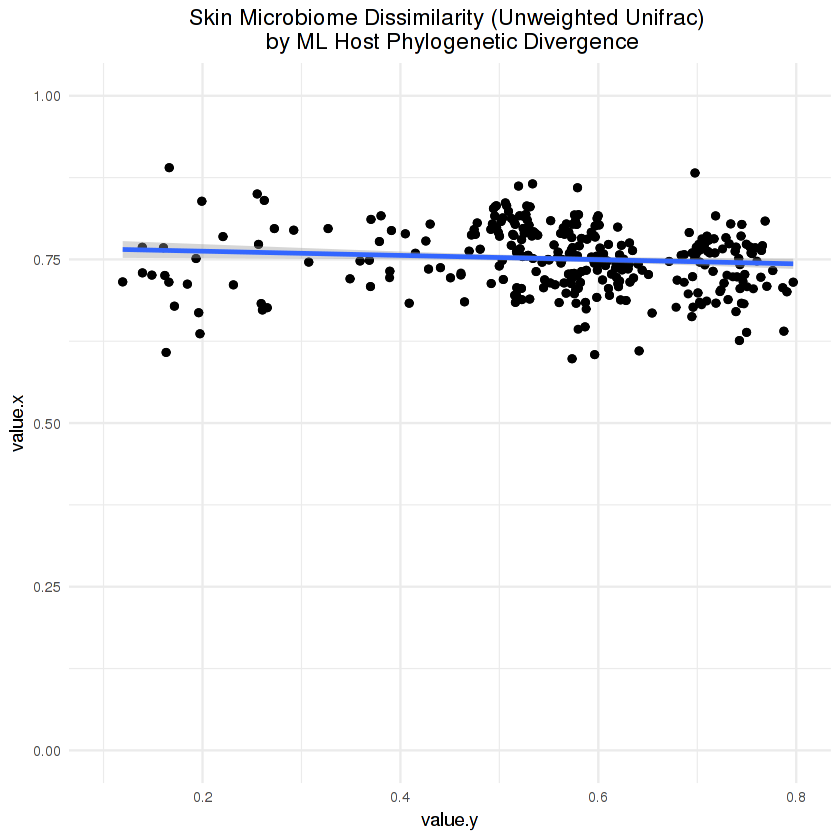

In [32]:
p = ggplot(skin.uf.2plot, aes(x=value.y, y=value.x)) + geom_point() + ggtitle("Skin Microbiome Dissimilarity (Unweighted Unifrac) \n by ML Host Phylogenetic Divergence")
p = p + geom_smooth(method = "lm")#, se=TRUE, alpha=.2)
p = p + theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) 
p = p + scale_y_continuous(limits=c(0,1))
p = p + scale_x_continuous(limits=c(.1,.8))
p